In [4]:
from typing import final

import pandas as pd
import numpy as np
from src.utils.data_utils import *
from matplotlib import pyplot as plt

## Loading the "_CMU Movie Summary Corpus_" dataset

In [33]:
# Giving an appropriate name to the columns
movie_headers = ["Wikipedia movie ID", "Freebase movie ID", "Movie name", "Movie release date", "Movie box office revenue", "Movie runtime", "Movie languages", "Movie countries", "Movie genres"]
movie_headers = [header.lower().replace(' ', '_') for header in movie_headers]

In [34]:
# Loading the CMU Movie Dataset
movies_df = pd.read_csv("./data/MovieSummaries/movie.metadata.tsv", sep="\t", header=None, names=movie_headers)
print_df_size("MoviesSummaries", movies_df)
movies_df.head(10)

MoviesSummaries - shape: (81741, 9) --> 81741 rows and 9 columns


,wikipedia_movie_id,freebase_movie_id,movie_name,movie_release_date,movie_box_office_revenue,movie_runtime,movie_languages,movie_countries,movie_genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
5,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen..."
6,18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002,NaN,86.0,"{""/m/02h40lc"": ""English Language""}","{""/m/0hzlz"": ""South Africa""}","{""/m/0hqxf"": ""Family Film"", ""/m/01hmnh"": ""Fant..."
7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ..."
8,9997961,/m/06_y2j7,Contigo y aquí,1974,NaN,NaN,"{""/m/06nm1"": ""Spanish Language""}","{""/m/0jgd"": ""Argentina""}","{""/m/04t36"": ""Musical"", ""/m/07s9rl0"": ""Drama"",..."
9,2345652,/m/075f66,City of the Dead,1960,NaN,76.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/03npn"": ""Horror"", ""/m/0fdjb"": ""Supernatur..."


## Loading the "_TMDB_" dataset

In [35]:
# Loading the TMDB Movie Dataset
tmdb_movies_df = pd.read_csv("./data/TMDBMovies/TMDB_movie_dataset_v11.csv")
print_df_size("TMDB", tmdb_movies_df)
tmdb_movies_df["revenue"]

TMDB - shape: (1139790, 24) --> 1139790 rows and 24 columns


0           825532764
1           701729206
2          1004558444
3          2923706026
4          1518815515
              ...    
1139785             0
1139786             0
1139787             0
1139788             0
1139789             0
Name: revenue, Length: 1139790, dtype: int64

## Merging the "_CMU Movie Summary Corpus_" with the "_TMDB_" datasets

In [36]:
# Loading the Converter Dataset and merging it with the TMDB datasets on the freebase ids
query_df = pd.read_csv("./data/Converter/query.csv", sep=',', header=0)
tmdb_with_ids_df = tmdb_movies_df.merge(query_df, how='inner', on='imdb_id')
# Merging the CMU and TMDB datasets on the freebase ids
full_merged = pd.merge(movies_df, tmdb_with_ids_df, left_on='freebase_movie_id', right_on='freebase_id', how='inner')
print_df_size("CMU & TMDB", full_merged)
full_merged

CMU & TMDB - shape: (68433, 34) --> 68433 rows and 34 columns


,wikipedia_movie_id,freebase_movie_id,movie_name,movie_release_date,movie_box_office_revenue,movie_runtime,movie_languages,movie_countries,movie_genres,id,...,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords,freebase_id
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",10016,...,"In 2176, a Martian police unit is sent to pick...",14.189,/i2zztssCIbahGES1fdfWFmDXian.jpg,Terror is the same on any planet.,"Action, Horror, Science Fiction","Animationwerks, Screen Gems, Storm King Produc...",United States of America,English,"future, planet mars, anti hero, possession, ho...",/m/03vyhn
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",784579,...,Dramatization of the story behind the murder o...,0.600,NaN,NaN,"Drama, Crime",NaN,United States of America,English,"colorado, jonbenet",/m/08yl5d
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",396302,...,A stolen bicycle case ends with drunken detect...,0.898,/rtFEOQQ0LVDv7y2bCgVVg3wWpXK.jpg,A film about murder and love,"Mystery, Crime, Drama","Filmeffekt AS, Norsk Film",Norway,Norwegian,"bicycle, private detective",/m/0crgdbh
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",33592,...,"In a wealthy and isolated desert community, a ...",8.297,/aLFoGmQpknOvcyx4imCP7Fuvoip.jpg,No woman is safe… while he is loose!,"Horror, Thriller",Mrs. White's Productions,United Kingdom,English,"based on novel or book, gas station, psychopat...",/m/0285_cd
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",11192,...,"Eva, an upper-class housewife, frustratedly le...",2.801,/iKeCVR0x8vnRXLtjwjZ7EuVFlo7.jpg,NaN,Drama,Dieter Geissler Filmproduktion,Germany,German,"jealousy, eroticism, gigolo, longing, dominatr...",/m/01mrr1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68428,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}",117124,...,A story that imagines how these real-world phe...,2.728,/xFGoPjzRXSDWUcnpFacrLOo7KF1.jpg,NaN,Science Fiction,DSP,United States of America,English,"mermaid, mockumentary, fake documentary",/m/0j7hxnt
68429,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",71771,...,An epic 12-year journey into the brutal and se...,1.656,/b93xbrz5kVYn5LUgHOznkaf5BvH.jpg,Twelve years. Three clans. One war.,Documentary,"Fís Éireann/Screen Ireland, Rise Films, BBC St...",Ireland,English,"sports, bare knuckle boxing, fistfight",/m/0g4pl34
68430,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}",285337,...,Nixon and Agnew played as Laurel and Hardy.,2.087,/pEbRbvMjFsTYcFGPuIwuscwxixJ.jpg,America's funniest comedy team of the decade.....,Comedy,Smo-Bro International Productions,United States of America,English,NaN,/m/02pygw1
68431,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/

In [37]:
# Dropping unnecessary columns
columns_to_drop = [
    "wikipedia_movie_id",
    "movie_runtime",
    "movie_languages",
    "title",
    "status",
    "runtime",
    "adult",
    "backdrop_path",
    "budget",
    "homepage",
    "original_language",
    "original_title",
    "overview",
    "poster_path",
    "tagline",
    "production_companies",
    "spoken_languages",
    "keywords",
    "freebase_id",
    "id",
    "imdb_id"
]
full_reduced = full_merged.drop(columns=columns_to_drop)
full_reduced

,freebase_movie_id,movie_name,movie_release_date,movie_box_office_revenue,movie_countries,movie_genres,vote_average,vote_count,release_date,revenue,popularity,genres,production_countries
0,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,"{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",5.127,977,2001-08-24,14010832,14.189,"Action, Horror, Science Fiction",United States of America
1,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,"{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",0.000,0,2000-02-16,0,0.600,"Drama, Crime",United States of America
2,/m/0crgdbh,Brun bitter,1988,NaN,"{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",0.000,0,1988-11-17,0,0.898,"Mystery, Crime, Drama",Norway
3,/m/0285_cd,White Of The Eye,1987,NaN,"{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",5.742,64,1987-06-19,0,8.297,"Horror, Thriller",United Kingdom
4,/m/01mrr1,A Woman in Flames,1983,NaN,"{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",5.300,13,1983-05-11,0,2.801,Drama,Germany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68428,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,"{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}",4.500,20,2011-03-19,0,2.728,Science Fiction,United States of America
68429,/m/0g4pl34,Knuckle,2011-01-21,NaN,"{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",5.700,28,2011-12-09,0,1.656,Documentary,Ireland
68430,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,"{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}",0.000,0,1972-08-23,0,2.087,Comedy,United States of America
68431,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,"{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ...",0.000,0,1992-05-21,0,0.600,"Action, Comedy, Animation, Fantasy, Science Fi...",Japan


In [38]:
# Cleaning the columns that contain dictionaries
full_reduced["movie_countries_cleaned"] = full_reduced["movie_countries"].apply(lambda x: list(dict(eval(x)).values()))
full_reduced["movie_genres_cleaned"] = full_reduced["movie_genres"].apply(lambda x: list(dict(eval(x)).values()))
full_reduced["movie_countries_cleaned"] = full_reduced["movie_countries_cleaned"].apply(lambda x: np.nan if x == [] else ', '.join(map(str, x)) if isinstance(x, list) else x)
full_reduced["movie_genres_cleaned"] = full_reduced["movie_genres_cleaned"].apply(lambda x: np.nan if x == [] else ', '.join(map(str, x)) if isinstance(x, list) else x)
full_reduced

,freebase_movie_id,movie_name,movie_release_date,movie_box_office_revenue,movie_countries,movie_genres,vote_average,vote_count,release_date,revenue,popularity,genres,production_countries,movie_countries_cleaned,movie_genres_cleaned
0,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,"{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",5.127,977,2001-08-24,14010832,14.189,"Action, Horror, Science Fiction",United States of America,United States of America,"Thriller, Science Fiction, Horror, Adventure, ..."
1,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,"{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",0.000,0,2000-02-16,0,0.600,"Drama, Crime",United States of America,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
2,/m/0crgdbh,Brun bitter,1988,NaN,"{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",0.000,0,1988-11-17,0,0.898,"Mystery, Crime, Drama",Norway,Norway,"Crime Fiction, Drama"
3,/m/0285_cd,White Of The Eye,1987,NaN,"{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",5.742,64,1987-06-19,0,8.297,"Horror, Thriller",United Kingdom,United Kingdom,"Thriller, Erotic thriller, Psychological thriller"
4,/m/01mrr1,A Woman in Flames,1983,NaN,"{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",5.300,13,1983-05-11,0,2.801,Drama,Germany,Germany,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68428,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,"{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}",4.500,20,2011-03-19,0,2.728,Science Fiction,United States of America,United States of America,Drama
68429,/m/0g4pl34,Knuckle,2011-01-21,NaN,"{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",5.700,28,2011-12-09,0,1.656,Documentary,Ireland,"Ireland, United Kingdom","Biographical film, Drama, Documentary"
68430,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,"{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}",0.000,0,1972-08-23,0,2.087,Comedy,United States of America,United States of America,"Satire, Comedy"
68431,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,"{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ...",0.000,0,1992-05-21,0,0.600,"Action, Comedy, Animation, Fantasy, Science Fi...",Japan,Japan,"Science Fiction, Japanese Movies, Adventure, A..."


In [39]:
# Combining and dropping the original columns
full_reduced['movie_countries_final'] = full_reduced['movie_countries_cleaned'].combine_first(full_reduced['production_countries'])
full_reduced['movie_genres_final'] = full_reduced['movie_genres_cleaned'].combine_first(full_reduced['genres'])
columns_to_drop = ['movie_countries_cleaned', 'production_countries', "movie_countries", 'movie_genres_cleaned', 'movie_genres', 'genres']
full_reduced.drop(columns=columns_to_drop, inplace=True)
full_reduced

,freebase_movie_id,movie_name,movie_release_date,movie_box_office_revenue,vote_average,vote_count,release_date,revenue,popularity,movie_countries_final,movie_genres_final
0,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,5.127,977,2001-08-24,14010832,14.189,United States of America,"Thriller, Science Fiction, Horror, Adventure, ..."
1,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,0.000,0,2000-02-16,0,0.600,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
2,/m/0crgdbh,Brun bitter,1988,NaN,0.000,0,1988-11-17,0,0.898,Norway,"Crime Fiction, Drama"
3,/m/0285_cd,White Of The Eye,1987,NaN,5.742,64,1987-06-19,0,8.297,United Kingdom,"Thriller, Erotic thriller, Psychological thriller"
4,/m/01mrr1,A Woman in Flames,1983,NaN,5.300,13,1983-05-11,0,2.801,Germany,Drama
...,...,...,...,...,...,...,...,...,...,...,...
68428,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,4.500,20,2011-03-19,0,2.728,United States of America,Drama
68429,/m/0g4pl34,Knuckle,2011-01-21,NaN,5.700,28,2011-12-09,0,1.656,"Ireland, United Kingdom","Biographical film, Drama, Documentary"
68430,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,0.000,0,1972-08-23,0,2.087,United States of America,"Satire, Comedy"
68431,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,0.000,0,1992-05-21,0,0.600,Japan,"Science Fiction, Japanese Movies, Adventure, A..."


In [40]:
# combine the redundant columns and ensure that we keep the maximum amount of information
full_reduced['combined_release_date'] = full_reduced['release_date'].combine_first(full_reduced['movie_release_date'])
full_reduced.drop(columns=['movie_release_date', 'release_date'], inplace=True)
full_reduced

,freebase_movie_id,movie_name,movie_box_office_revenue,vote_average,vote_count,revenue,popularity,movie_countries_final,movie_genres_final,combined_release_date
0,/m/03vyhn,Ghosts of Mars,14010832.0,5.127,977,14010832,14.189,United States of America,"Thriller, Science Fiction, Horror, Adventure, ...",2001-08-24
1,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,NaN,0.000,0,0,0.600,United States of America,"Mystery, Biographical film, Drama, Crime Drama",2000-02-16
2,/m/0crgdbh,Brun bitter,NaN,0.000,0,0,0.898,Norway,"Crime Fiction, Drama",1988-11-17
3,/m/0285_cd,White Of The Eye,NaN,5.742,64,0,8.297,United Kingdom,"Thriller, Erotic thriller, Psychological thriller",1987-06-19
4,/m/01mrr1,A Woman in Flames,NaN,5.300,13,0,2.801,Germany,Drama,1983-05-11
...,...,...,...,...,...,...,...,...,...,...
68428,/m/0j7hxnt,Mermaids: The Body Found,NaN,4.500,20,0,2.728,United States of America,Drama,2011-03-19
68429,/m/0g4pl34,Knuckle,NaN,5.700,28,0,1.656,"Ireland, United Kingdom","Biographical film, Drama, Documentary",2011-12-09
68430,/m/02pygw1,Another Nice Mess,NaN,0.000,0,0,2.087,United States of America,"Satire, Comedy",1972-08-23
68431,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,NaN,0.000,0,0,0.600,Japan,"Science Fiction, Japanese Movies, Adventure, A...",1992-05-21


In [41]:
full_reduced.dtypes

freebase_movie_id            object
movie_name                   object
movie_box_office_revenue    float64
vote_average                float64
vote_count                    int64
revenue                       int64
popularity                  float64
movie_countries_final        object
movie_genres_final           object
combined_release_date        object
dtype: object

In [42]:
# Convert the combined release date to datetime
full_reduced['combined_release_date'] = pd.to_datetime(full_reduced['combined_release_date'], errors='coerce')
full_reduced

,freebase_movie_id,movie_name,movie_box_office_revenue,vote_average,vote_count,revenue,popularity,movie_countries_final,movie_genres_final,combined_release_date
0,/m/03vyhn,Ghosts of Mars,14010832.0,5.127,977,14010832,14.189,United States of America,"Thriller, Science Fiction, Horror, Adventure, ...",2001-08-24
1,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,NaN,0.000,0,0,0.600,United States of America,"Mystery, Biographical film, Drama, Crime Drama",2000-02-16
2,/m/0crgdbh,Brun bitter,NaN,0.000,0,0,0.898,Norway,"Crime Fiction, Drama",1988-11-17
3,/m/0285_cd,White Of The Eye,NaN,5.742,64,0,8.297,United Kingdom,"Thriller, Erotic thriller, Psychological thriller",1987-06-19
4,/m/01mrr1,A Woman in Flames,NaN,5.300,13,0,2.801,Germany,Drama,1983-05-11
...,...,...,...,...,...,...,...,...,...,...
68428,/m/0j7hxnt,Mermaids: The Body Found,NaN,4.500,20,0,2.728,United States of America,Drama,2011-03-19
68429,/m/0g4pl34,Knuckle,NaN,5.700,28,0,1.656,"Ireland, United Kingdom","Biographical film, Drama, Documentary",2011-12-09
68430,/m/02pygw1,Another Nice Mess,NaN,0.000,0,0,2.087,United States of America,"Satire, Comedy",1972-08-23
68431,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,NaN,0.000,0,0,0.600,Japan,"Science Fiction, Japanese Movies, Adventure, A...",1992-05-21


In [43]:
full_reduced["movie_box_office_revenue_nan"]=full_reduced["movie_box_office_revenue"].replace(0, np.nan)
full_reduced["revenue_nan"]= full_reduced["revenue"].replace(0, np.nan)

In [44]:
# Doing the same trick for the box office revenue but by replacing 0 by nan first
full_reduced["Box_Office"] = full_reduced["movie_box_office_revenue_nan"].combine_first(full_reduced["revenue_nan"])
full_reduced.drop(columns=['movie_box_office_revenue', 'revenue', "movie_box_office_revenue_nan", "revenue_nan"], inplace=True)
full_reduced

,freebase_movie_id,movie_name,vote_average,vote_count,popularity,movie_countries_final,movie_genres_final,combined_release_date,Box_Office
0,/m/03vyhn,Ghosts of Mars,5.127,977,14.189,United States of America,"Thriller, Science Fiction, Horror, Adventure, ...",2001-08-24,14010832.0
1,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,0.000,0,0.600,United States of America,"Mystery, Biographical film, Drama, Crime Drama",2000-02-16,NaN
2,/m/0crgdbh,Brun bitter,0.000,0,0.898,Norway,"Crime Fiction, Drama",1988-11-17,NaN
3,/m/0285_cd,White Of The Eye,5.742,64,8.297,United Kingdom,"Thriller, Erotic thriller, Psychological thriller",1987-06-19,NaN
4,/m/01mrr1,A Woman in Flames,5.300,13,2.801,Germany,Drama,1983-05-11,NaN
...,...,...,...,...,...,...,...,...,...
68428,/m/0j7hxnt,Mermaids: The Body Found,4.500,20,2.728,United States of America,Drama,2011-03-19,NaN
68429,/m/0g4pl34,Knuckle,5.700,28,1.656,"Ireland, United Kingdom","Biographical film, Drama, Documentary",2011-12-09,NaN
68430,/m/02pygw1,Another Nice Mess,0.000,0,2.087,United States of America,"Satire, Comedy",1972-08-23,NaN
68431,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,0.000,0,0.600,Japan,"Science Fiction, Japanese Movies, Adventure, A...",1992-05-21,NaN


In [45]:
full_reduced.isna().sum()

freebase_movie_id            0
movie_name                   0
vote_average                 0
vote_count                   0
popularity                   0
movie_countries_final      850
movie_genres_final         233
combined_release_date      275
Box_Office               56595
dtype: int64

In [46]:
# Drop the rows with empty release dates or genres or countries in order to perform analysis
# We keep the one with empty box office revenue as we might have other information to compute its popularity
full_reduced = full_reduced.dropna(subset=['combined_release_date', 'movie_genres_final', 'movie_countries_final'])

In [47]:
print_df_size("full_reduced", full_reduced)
full_reduced

full_reduced - shape: (67149, 9) --> 67149 rows and 9 columns


,freebase_movie_id,movie_name,vote_average,vote_count,popularity,movie_countries_final,movie_genres_final,combined_release_date,Box_Office
0,/m/03vyhn,Ghosts of Mars,5.127,977,14.189,United States of America,"Thriller, Science Fiction, Horror, Adventure, ...",2001-08-24,14010832.0
1,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,0.000,0,0.600,United States of America,"Mystery, Biographical film, Drama, Crime Drama",2000-02-16,NaN
2,/m/0crgdbh,Brun bitter,0.000,0,0.898,Norway,"Crime Fiction, Drama",1988-11-17,NaN
3,/m/0285_cd,White Of The Eye,5.742,64,8.297,United Kingdom,"Thriller, Erotic thriller, Psychological thriller",1987-06-19,NaN
4,/m/01mrr1,A Woman in Flames,5.300,13,2.801,Germany,Drama,1983-05-11,NaN
...,...,...,...,...,...,...,...,...,...
68428,/m/0j7hxnt,Mermaids: The Body Found,4.500,20,2.728,United States of America,Drama,2011-03-19,NaN
68429,/m/0g4pl34,Knuckle,5.700,28,1.656,"Ireland, United Kingdom","Biographical film, Drama, Documentary",2011-12-09,NaN
68430,/m/02pygw1,Another Nice Mess,0.000,0,2.087,United States of America,"Satire, Comedy",1972-08-23,NaN
68431,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,0.000,0,0.600,Japan,"Science Fiction, Japanese Movies, Adventure, A...",1992-05-21,NaN


In [48]:
#save it in a pickle file for faster loading
full_reduced.to_pickle("./data/CMU_and_TDB.pkl")

## Loading the "_MovieLens_" dataset

In [49]:
# Load the MovieLens dataset
added_movies = pd.read_json('./data/MovieLens/raw/metadata_updated.json', lines=True)

## Merging the "_CMU Movie Summary Corpus_", "_TMDB_" and "_MovieLens_" datasets

In [50]:
#preparing the dataset for merging
added_movies["imdbId"] = added_movies["imdbId"].astype(str)
print_df_size("MovieLens", added_movies)
added_movies

MovieLens - shape: (84661, 6) --> 84661 rows and 6 columns


,title,directedBy,starring,avgRating,imdbId,item_id
0,Toy Story (1995),John Lasseter,"Tim Allen, Tom Hanks, Don Rickles, Jim Varney,...",3.89146,114709,1
1,Jumanji (1995),Joe Johnston,"Jonathan Hyde, Bradley Pierce, Robin Williams,...",3.26605,113497,2
2,Grumpier Old Men (1995),Howard Deutch,"Jack Lemmon, Walter Matthau, Ann-Margret , Sop...",3.17146,113228,3
3,Waiting to Exhale (1995),Forest Whitaker,"Angela Bassett, Loretta Devine, Whitney Housto...",2.86824,114885,4
4,Father of the Bride Part II (1995),Charles Shyer,"Steve Martin, Martin Short, Diane Keaton, Kimb...",3.07620,113041,5
...,...,...,...,...,...,...
84656,The Tenth Level (1976),Charles S. Dubin,"William Shatner,Lynn Carlin,Ossie Davis,Viveca...",0.00000,75320,239306
84657,Nightmare (1974),William Hale,"Richard Crenna,Patty Duke,Vic Morrow,Arlene Go...",0.00000,71911,239308
84658,Pee Nak (2019),Phontharis Chotkijsadarsopon,"Chinawut Indracusin,Paisarnkulwong Vachiravit,...",0.00000,8258474,239310
84659,Pee Nak 2 (2020),Phontharis Chotkijsadarsopon,"วชิรวิชญ์ ไพศาลกุลวงศ์,ภูริพรรธน์ เวชวงศาเตชาว...",0.00000,11906412,239312


In [51]:
converter = pd.read_csv('./data/Converter/query.csv')
print_df_size("converter",converter)

converter - shape: (409064, 2) --> 409064 rows and 2 columns


In [52]:
converter["imdb_id"] = converter["imdb_id"].str[3:]
converter.head(10)

,imdb_id,freebase_id
0,010930,/m/0282x
1,124133,/m/09b6zr
2,684496,/m/014d3
3,061667,/m/01rgr
4,675434,/m/0hgqwpj
5,949918,/m/0m2l9
6,180134,/m/0fyh4
7,001789,/m/0hy8
8,686817,/m/05qmj
9,000658,/m/0h0wc


In [53]:
merged_data = pd.merge(full_reduced, converter, left_on="freebase_movie_id", right_on="freebase_id", how='inner')

In [54]:
merged_data = merged_data.drop_duplicates(subset='freebase_movie_id', keep='first')
print_df_size("full_reduced after dropping duplicates", full_reduced)
merged_data

full_reduced after dropping duplicates - shape: (67149, 9) --> 67149 rows and 9 columns


,freebase_movie_id,movie_name,vote_average,vote_count,popularity,movie_countries_final,movie_genres_final,combined_release_date,Box_Office,imdb_id,freebase_id
0,/m/03vyhn,Ghosts of Mars,5.127,977,14.189,United States of America,"Thriller, Science Fiction, Horror, Adventure, ...",2001-08-24,14010832.0,228333,/m/03vyhn
1,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,0.000,0,0.600,United States of America,"Mystery, Biographical film, Drama, Crime Drama",2000-02-16,NaN,245916,/m/08yl5d
2,/m/0crgdbh,Brun bitter,0.000,0,0.898,Norway,"Crime Fiction, Drama",1988-11-17,NaN,094806,/m/0crgdbh
3,/m/0285_cd,White Of The Eye,5.742,64,8.297,United Kingdom,"Thriller, Erotic thriller, Psychological thriller",1987-06-19,NaN,094320,/m/0285_cd
4,/m/01mrr1,A Woman in Flames,5.300,13,2.801,Germany,Drama,1983-05-11,NaN,083949,/m/01mrr1
...,...,...,...,...,...,...,...,...,...,...,...
67312,/m/0j7hxnt,Mermaids: The Body Found,4.500,20,2.728,United States of America,Drama,2011-03-19,NaN,816585,/m/0j7hxnt
67313,/m/0g4pl34,Knuckle,5.700,28,1.656,"Ireland, United Kingdom","Biographical film, Drama, Documentary",2011-12-09,NaN,606259,/m/0g4pl34
67314,/m/02pygw1,Another Nice Mess,0.000,0,2.087,United States of America,"Satire, Comedy",1972-08-23,NaN,362411,/m/02pygw1
67315,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,0.000,0,0.600,Japan,"Science Fiction, Japanese Movies, Adventure, A...",1992-05-21,NaN,113726,/m/03pcrp


In [55]:
final_data = pd.merge(merged_data, added_movies, left_on='imdb_id', right_on="imdbId", how='left')
final_data

,freebase_movie_id,movie_name,vote_average,vote_count,popularity,movie_countries_final,movie_genres_final,combined_release_date,Box_Office,imdb_id,freebase_id,title,directedBy,starring,avgRating,imdbId,item_id
0,/m/03vyhn,Ghosts of Mars,5.127,977,14.189,United States of America,"Thriller, Science Fiction, Horror, Adventure, ...",2001-08-24,14010832.0,228333,/m/03vyhn,Ghosts of Mars (2001),John Carpenter,"Natasha Henstridge, Ice Cube, Jason Statham, C...",2.35723,228333,4735.0
1,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,0.000,0,0.600,United States of America,"Mystery, Biographical film, Drama, Crime Drama",2000-02-16,NaN,245916,/m/08yl5d,NaN,NaN,NaN,NaN,NaN,NaN
2,/m/0crgdbh,Brun bitter,0.000,0,0.898,Norway,"Crime Fiction, Drama",1988-11-17,NaN,094806,/m/0crgdbh,NaN,NaN,NaN,NaN,NaN,NaN
3,/m/0285_cd,White Of The Eye,5.742,64,8.297,United Kingdom,"Thriller, Erotic thriller, Psychological thriller",1987-06-19,NaN,094320,/m/0285_cd,NaN,NaN,NaN,NaN,NaN,NaN
4,/m/01mrr1,A Woman in Flames,5.300,13,2.801,Germany,Drama,1983-05-11,NaN,083949,/m/01mrr1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67089,/m/0j7hxnt,Mermaids: The Body Found,4.500,20,2.728,United States of America,Drama,2011-03-19,NaN,816585,/m/0j7hxnt,NaN,NaN,NaN,NaN,NaN,NaN
67090,/m/0g4pl34,Knuckle,5.700,28,1.656,"Ireland, United Kingdom","Biographical film, Drama, Documentary",2011-12-09,NaN,606259,/m/0g4pl34,NaN,NaN,NaN,NaN,NaN,NaN
67091,/m/02pygw1,Another Nice Mess,0.000,0,2.087,United States of America,"Satire, Comedy",1972-08-23,NaN,362411,/m/02pygw1,Another Nice Mess (1972),Bob Einstein,"Rich Little,Herb Voland,Diahn Williams,Bruce K...",0.00000,362411,146598.0
67092,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,0.000,0,0.600,Japan,"Science Fiction, Japanese Movies, Adventure, A...",1992-05-21,NaN,113726,/m/03pcrp,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
columns_to_drop = ['title','directedBy', 'starring', 'imdbId', 'freebase_id']

In [57]:
filtered_final_data = final_data.drop(columns=columns_to_drop)
print_df_size("filtered final data", filtered_final_data)
filtered_final_data

filtered final data - shape: (67094, 12) --> 67094 rows and 12 columns


,freebase_movie_id,movie_name,vote_average,vote_count,popularity,movie_countries_final,movie_genres_final,combined_release_date,Box_Office,imdb_id,avgRating,item_id
0,/m/03vyhn,Ghosts of Mars,5.127,977,14.189,United States of America,"Thriller, Science Fiction, Horror, Adventure, ...",2001-08-24,14010832.0,228333,2.35723,4735.0
1,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,0.000,0,0.600,United States of America,"Mystery, Biographical film, Drama, Crime Drama",2000-02-16,NaN,245916,NaN,NaN
2,/m/0crgdbh,Brun bitter,0.000,0,0.898,Norway,"Crime Fiction, Drama",1988-11-17,NaN,094806,NaN,NaN
3,/m/0285_cd,White Of The Eye,5.742,64,8.297,United Kingdom,"Thriller, Erotic thriller, Psychological thriller",1987-06-19,NaN,094320,NaN,NaN
4,/m/01mrr1,A Woman in Flames,5.300,13,2.801,Germany,Drama,1983-05-11,NaN,083949,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
67089,/m/0j7hxnt,Mermaids: The Body Found,4.500,20,2.728,United States of America,Drama,2011-03-19,NaN,816585,NaN,NaN
67090,/m/0g4pl34,Knuckle,5.700,28,1.656,"Ireland, United Kingdom","Biographical film, Drama, Documentary",2011-12-09,NaN,606259,NaN,NaN
67091,/m/02pygw1,Another Nice Mess,0.000,0,2.087,United States of America,"Satire, Comedy",1972-08-23,NaN,362411,0.00000,146598.0
67092,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,0.000,0,0.600,Japan,"Science Fiction, Japanese Movies, Adventure, A...",1992-05-21,NaN,113726,NaN,NaN


In [58]:
# Save the final data in a pickle file for faster loading
filtered_final_data.to_pickle("./data/Three_Datasets_Combined.pkl")

## Loading the "_MovieLens Reviews_" dataset

In [59]:
# Load the reviews dataset
#reviews_df = pd.read_json('./data/MovieLens/raw/reviews.json', lines=True)
#reviews_df.head(10)

In [60]:
#save it in a pickle file for faster loading
#reviews_df.to_pickle('./data/reviews.pkl')

## Preparing the reviews dataset for the sentiment analysis

In [61]:
# For faster loading we will load the reviews from the pickle file
reviews_df = pd.read_pickle('./data/reviews.pkl')
reviews_df

,item_id,txt
0,172063,"one-shot record of a belly dancer; ""Carmencita..."
1,95541,Banging Away..; Thomas Edison and William K.L....
2,7065,unbelievable; I cannot understand how anyone c...
3,3739,I'm still starry-eyed from it; I saw this last...
4,1562,Failed on every Front; Joel Schumacher who did...
...,...,...
2624603,520,"Aims low, with hilarious results; ROBIN HOOD: ..."
2624604,8640,Worst epic of 2004; I usually love big epics i...
2624605,1377,superb Second Movie; I was glad to see that Ti...
2624606,26746,Seagal takes out the garbage; This is hard cor...


In [62]:
reviews_df

,item_id,txt
0,172063,"one-shot record of a belly dancer; ""Carmencita..."
1,95541,Banging Away..; Thomas Edison and William K.L....
2,7065,unbelievable; I cannot understand how anyone c...
3,3739,I'm still starry-eyed from it; I saw this last...
4,1562,Failed on every Front; Joel Schumacher who did...
...,...,...
2624603,520,"Aims low, with hilarious results; ROBIN HOOD: ..."
2624604,8640,Worst epic of 2004; I usually love big epics i...
2624605,1377,superb Second Movie; I was glad to see that Ti...
2624606,26746,Seagal takes out the garbage; This is hard cor...


In [63]:
# We are only going to apply sentiment analysis on the reviews that are available in our above dataset
reviews_df = reviews_df.reset_index()
merged_reviews = pd.merge(reviews_df, filtered_final_data, left_on='item_id', right_on='item_id', how='inner')
print_df_size("merged reviews", merged_reviews)
merged_reviews.isna().sum()

merged reviews - shape: (1293847, 14) --> 1293847 rows and 14 columns


index                         0
item_id                       0
txt                           0
freebase_movie_id             0
movie_name                    0
vote_average                  0
vote_count                    0
popularity                    0
movie_countries_final         0
movie_genres_final            0
combined_release_date         0
Box_Office               179941
imdb_id                       0
avgRating                     0
dtype: int64

In [64]:
merged_reviews = merged_reviews.sort_values(by='item_id')

In [65]:
merged_reviews = merged_reviews.rename(columns={'txt': 'review'})
merged_reviews

,index,item_id,review,freebase_movie_id,movie_name,vote_average,vote_count,popularity,movie_countries_final,movie_genres_final,combined_release_date,Box_Office,imdb_id,avgRating
260872,412847,1,Fantastic Revolutionary Computer Animation Cla...,/m/0dyb1,Toy Story,7.971,17152,78.404,United States of America,"Buddy film, Adventure, Children's/Family, Comp...",1995-10-30,361958736.0,114709,3.89146
828262,2044033,1,The best film for small children....; My toddl...,/m/0dyb1,Toy Story,7.971,17152,78.404,United States of America,"Buddy film, Adventure, Children's/Family, Comp...",1995-10-30,361958736.0,114709,3.89146
463118,757613,1,Toy Story was like the Snow White of 1995; I r...,/m/0dyb1,Toy Story,7.971,17152,78.404,United States of America,"Buddy film, Adventure, Children's/Family, Comp...",1995-10-30,361958736.0,114709,3.89146
642563,1325676,1,Timeless Animation; Toy Story came out right i...,/m/0dyb1,Toy Story,7.971,17152,78.404,United States of America,"Buddy film, Adventure, Children's/Family, Comp...",1995-10-30,361958736.0,114709,3.89146
409172,658384,1,A timeless classic.; Toy Story is truly a grou...,/m/0dyb1,Toy Story,7.971,17152,78.404,United States of America,"Buddy film, Adventure, Children's/Family, Comp...",1995-10-30,361958736.0,114709,3.89146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393355,630958,182351,Too Many Things Going Nowhere; Zulawski's 'La ...,/m/0b6g2ym,Fidelity,5.900,41,11.397,France,Drama,2000-04-05,NaN,204761,3.00000
1066765,2349839,182351,Zulawski films an outburst of passion and viol...,/m/0b6g2ym,Fidelity,5.900,41,11.397,France,Drama,2000-04-05,NaN,204761,3.00000
1066764,2349838,182351,a bold but flawed attempt; I like French cinem...,/m/0b6g2ym,Fidelity,5.900,41,11.397,France,Drama,2000-04-05,NaN,204761,3.00000
1066766,2349840,182351,"Too many things left me confused, disjointed a...",/m/0b6g2ym,Fidelity,5.900,41,11.397,France,Drama,2000-04-05,NaN,204761,3.00000


In [66]:
# Final dataset for sentiment analysis
merged_reviews.to_pickle('./data/merged_data_with_reviews.pkl')

## Loading the sentiment analysis output

In [67]:
df_sa = pd.read_csv('./data/sentiment_analysis.csv')
df_sa

,Unnamed: 0,sentiment_analysis,item_id,index
0,828299,"{'label': 'NEGATIVE', 'score': 0.9858629107475...",1,2044046
1,828302,"{'label': 'POSITIVE', 'score': 0.9998522996902...",1,2044054
2,828305,"{'label': 'POSITIVE', 'score': 0.9990456700325...",1,2044063
3,828306,"{'label': 'POSITIVE', 'score': 0.9998844861984...",1,2044069
4,828308,"{'label': 'POSITIVE', 'score': 0.9972469806671...",1,2044077
...,...,...,...,...
1293912,1066793,"{'label': 'POSITIVE', 'score': 0.9996471405029...",182351,2349835
1293913,1066794,"{'label': 'NEGATIVE', 'score': 0.9994913339614...",182351,2349836
1293914,1066795,"{'label': 'NEGATIVE', 'score': 0.9910902976989...",182351,2349837
1293915,1066796,"{'label': 'POSITIVE', 'score': 0.7443559765815...",182351,2349838


In [68]:
# Split the sentiment_analysis column into two columns, one for the label and one for the score
df_sa['sentiment_analysis'] = df_sa['sentiment_analysis'].apply(eval)
df_sa[['label', 'score']] = df_sa['sentiment_analysis'].apply(pd.Series)

In [69]:
df_sa

,Unnamed: 0,sentiment_analysis,item_id,index,label,score
0,828299,"{'label': 'NEGATIVE', 'score': 0.9858629107475...",1,2044046,NEGATIVE,0.985863
1,828302,"{'label': 'POSITIVE', 'score': 0.9998522996902...",1,2044054,POSITIVE,0.999852
2,828305,"{'label': 'POSITIVE', 'score': 0.9990456700325...",1,2044063,POSITIVE,0.999046
3,828306,"{'label': 'POSITIVE', 'score': 0.9998844861984...",1,2044069,POSITIVE,0.999884
4,828308,"{'label': 'POSITIVE', 'score': 0.9972469806671...",1,2044077,POSITIVE,0.997247
...,...,...,...,...,...,...
1293912,1066793,"{'label': 'POSITIVE', 'score': 0.9996471405029...",182351,2349835,POSITIVE,0.999647
1293913,1066794,"{'label': 'NEGATIVE', 'score': 0.9994913339614...",182351,2349836,NEGATIVE,0.999491
1293914,1066795,"{'label': 'NEGATIVE', 'score': 0.9910902976989...",182351,2349837,NEGATIVE,0.991090
1293915,1066796,"{'label': 'POSITIVE', 'score': 0.7443559765815...",182351,2349838,POSITIVE,0.744356


In [70]:
# Remove unnecessary columns
df_sa.drop(columns=['sentiment_analysis', "Unnamed: 0", "index"], inplace=True)

In [71]:
df_sa

,item_id,label,score
0,1,NEGATIVE,0.985863
1,1,POSITIVE,0.999852
2,1,POSITIVE,0.999046
3,1,POSITIVE,0.999884
4,1,POSITIVE,0.997247
...,...,...,...
1293912,182351,POSITIVE,0.999647
1293913,182351,NEGATIVE,0.999491
1293914,182351,NEGATIVE,0.991090
1293915,182351,POSITIVE,0.744356


In [72]:
# Replace the labels with 0 and 1
df_sa['label'] = df_sa['label'].replace({'NEGATIVE': 0, 'POSITIVE': 1})

/var/folders/ft/f5drds915nl_7p2g4tg67z840000gn/T/ipykernel_5207/239441466.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_sa['label'] = df_sa['label'].replace({'NEGATIVE': 0, 'POSITIVE': 1})


In [73]:
df_sa

,item_id,label,score
0,1,0,0.985863
1,1,1,0.999852
2,1,1,0.999046
3,1,1,0.999884
4,1,1,0.997247
...,...,...,...
1293912,182351,1,0.999647
1293913,182351,0,0.999491
1293914,182351,0,0.991090
1293915,182351,1,0.744356


In [74]:
#getting the mean per item id
mean_sa = df_sa.groupby('item_id')['label'].mean().reset_index()
mean_sa

,item_id,label
0,1,0.912114
1,2,0.775148
2,3,0.716667
3,4,0.632653
4,5,0.666667
...,...,...
12101,181757,0.666667
12102,181765,1.000000
12103,182085,0.750000
12104,182323,1.000000


## Merging the 3 datasets with the sentiment analysis output (see sentiment_analysis.ipynb)

In [81]:
df_three_datasets_combined = pd.read_pickle("./data/Three_Datasets_Combined.pkl")
df_final = df_three_datasets_combined.merge(mean_sa, on='item_id', how='left')
df_final

,freebase_movie_id,movie_name,vote_average,vote_count,popularity,movie_countries_final,movie_genres_final,combined_release_date,Box_Office,imdb_id,avgRating,item_id,label
0,/m/03vyhn,Ghosts of Mars,5.127,977,14.189,United States of America,"Thriller, Science Fiction, Horror, Adventure, ...",2001-08-24,14010832.0,228333,2.35723,4735.0,0.351293
1,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,0.000,0,0.600,United States of America,"Mystery, Biographical film, Drama, Crime Drama",2000-02-16,NaN,245916,NaN,NaN,NaN
2,/m/0crgdbh,Brun bitter,0.000,0,0.898,Norway,"Crime Fiction, Drama",1988-11-17,NaN,094806,NaN,NaN,NaN
3,/m/0285_cd,White Of The Eye,5.742,64,8.297,United Kingdom,"Thriller, Erotic thriller, Psychological thriller",1987-06-19,NaN,094320,NaN,NaN,NaN
4,/m/01mrr1,A Woman in Flames,5.300,13,2.801,Germany,Drama,1983-05-11,NaN,083949,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67089,/m/0j7hxnt,Mermaids: The Body Found,4.500,20,2.728,United States of America,Drama,2011-03-19,NaN,816585,NaN,NaN,NaN
67090,/m/0g4pl34,Knuckle,5.700,28,1.656,"Ireland, United Kingdom","Biographical film, Drama, Documentary",2011-12-09,NaN,606259,NaN,NaN,NaN
67091,/m/02pygw1,Another Nice Mess,0.000,0,2.087,United States of America,"Satire, Comedy",1972-08-23,NaN,362411,0.00000,146598.0,0.600000
67092,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,0.000,0,0.600,Japan,"Science Fiction, Japanese Movies, Adventure, A...",1992-05-21,NaN,113726,NaN,NaN,NaN


In [82]:
df_final.to_pickle("./data/OurFinalDataset.pkl")

# Data Exploration

In [83]:
import pandas as pd
from matplotlib import pyplot as plt

In [84]:
filtered_final_data = pd.read_pickle('./data/OurFinalDataset.pkl')
filtered_final_data

,freebase_movie_id,movie_name,vote_average,vote_count,popularity,movie_countries_final,movie_genres_final,combined_release_date,Box_Office,imdb_id,avgRating,item_id,label
0,/m/03vyhn,Ghosts of Mars,5.127,977,14.189,United States of America,"Thriller, Science Fiction, Horror, Adventure, ...",2001-08-24,14010832.0,228333,2.35723,4735.0,0.351293
1,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,0.000,0,0.600,United States of America,"Mystery, Biographical film, Drama, Crime Drama",2000-02-16,NaN,245916,NaN,NaN,NaN
2,/m/0crgdbh,Brun bitter,0.000,0,0.898,Norway,"Crime Fiction, Drama",1988-11-17,NaN,094806,NaN,NaN,NaN
3,/m/0285_cd,White Of The Eye,5.742,64,8.297,United Kingdom,"Thriller, Erotic thriller, Psychological thriller",1987-06-19,NaN,094320,NaN,NaN,NaN
4,/m/01mrr1,A Woman in Flames,5.300,13,2.801,Germany,Drama,1983-05-11,NaN,083949,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67089,/m/0j7hxnt,Mermaids: The Body Found,4.500,20,2.728,United States of America,Drama,2011-03-19,NaN,816585,NaN,NaN,NaN
67090,/m/0g4pl34,Knuckle,5.700,28,1.656,"Ireland, United Kingdom","Biographical film, Drama, Documentary",2011-12-09,NaN,606259,NaN,NaN,NaN
67091,/m/02pygw1,Another Nice Mess,0.000,0,2.087,United States of America,"Satire, Comedy",1972-08-23,NaN,362411,0.00000,146598.0,0.600000
67092,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,0.000,0,0.600,Japan,"Science Fiction, Japanese Movies, Adventure, A...",1992-05-21,NaN,113726,NaN,NaN,NaN


In [85]:
#Ensure that the genres column contains a list
filtered_final_data['movie_genres_final'] = filtered_final_data['movie_genres_final'].apply(lambda x: x.split(', ') if isinstance(x, str) else x)

#Use explode to separate the genres
df_genres = filtered_final_data.explode('movie_genres_final')

#Group by the genres and in the columns we have list of corresponding attributes
grouped_by_genre = df_genres.groupby('movie_genres_final').agg(list).reset_index()
grouped_by_genre

,movie_genres_final,freebase_movie_id,movie_name,vote_average,vote_count,popularity,movie_countries_final,combined_release_date,Box_Office,imdb_id,avgRating,item_id,label
0,Absurdism,"[/m/08ns88, /m/0ckt6, /m/0ftpzz, /m/03c27sq, /...","[Brain Donors, Airplane!, The Golf Specialist,...","[6.296, 7.282, 5.4, 8.8, 7.797, 5.5, 7.403, 4....","[54, 4057, 25, 4, 5280, 33, 599, 51, 959, 654,...","[4.001, 32.122, 1.237, 1.274, 28.015, 5.522, 1...","[United States of America, United States of Am...","[1992-04-17 00:00:00, 1980-07-02 00:00:00, 193...","[918239.0, 83453539.0, nan, nan, 1940906.0, na...","[103872, 080339, 020927, 136201, 071853, 06462...","[3.32051, nan, nan, nan, nan, nan, nan, 2.4705...","[8040.0, nan, nan, nan, nan, nan, nan, 101168....","[0.7878787878787878, nan, nan, nan, nan, nan, ..."
1,Acid western,"[/m/047gmx9, /m/0symg, /m/0g4fl5, /m/060dpr, /...","[Greaser's Palace, Dead Man, Zachariah, El Top...","[4.789, 7.292, 5.154, 7.087, 6.1, 6.396, 6.367...","[19, 1416, 13, 531, 60, 101, 75, 63, 8]","[3.677, 17.858, 1.452, 14.117, 6.687, 7.405, 9...","[United States of America, United States of Am...","[1972-07-31 00:00:00, 1995-12-23 00:00:00, 197...","[nan, 1025488.0, nan, nan, nan, nan, nan, 2570...","[068659, 112817, 068011, 067866, 067204, 06226...","[nan, 3.88657, nan, nan, nan, nan, nan, nan, nan]","[nan, 714.0, nan, nan, nan, nan, nan, nan, nan]","[nan, 0.7134146341463414, nan, nan, nan, nan, ..."
2,Action,"[/m/03vyhn, /m/02r52hc, /m/02pml15, /m/0cws46,...","[Ghosts of Mars, The Mechanical Monsters, Vand...","[5.127, 6.805, 7.2, 5.449, 0.0, 5.871, 5.0, 5....","[977, 41, 16, 69, 0, 42, 4, 9, 14, 3, 11, 14, ...","[14.189, 3.069, 3.559, 11.208, 0.624, 4.82, 0....","[United States of America, United States of Am...","[2001-08-24 00:00:00, 1941-11-28 00:00:00, 198...","[14010832.0, nan, nan, 3416846.0, nan, nan, na...","[228333, 033888, 255668, 097670, 255267, 07465...","[2.35723, nan, nan, nan, nan, nan, nan, 2.6666...","[4735.0, nan, nan, nan, nan, nan, nan, 107268....","[0.35129310344827586, nan, nan, nan, nan, nan,..."
3,Action Comedy,"[/m/07v6f3, /m/0dstt0, /m/026wlxw, /m/01l_pn, ...","[The Human Tornado, Stroker Ace, Get Smart, Ch...","[5.871, 5.1, 6.17, 5.455, 6.1, 5.696, 6.029, 6...","[42, 43, 3315, 2811, 75, 1762, 105, 180, 2, 25...","[4.82, 7.462, 20.629, 28.985, 9.744, 18.798, 6...","[United States of America, United States of Am...","[1976-10-02 00:00:00, 1983-07-01 00:00:00, 200...","[nan, 13000000.0, 230685453.0, 259175788.0, na...","[074653, 086379, 425061, 305357, 273842, 29009...","[nan, nan, 3.15599, 2.50672, 2.89623, 2.556580...","[nan, nan, 60126.0, 6503.0, 73879.0, 5621.0, n...","[nan, nan, 0.6061381074168798, 0.3989266547406..."
4,Action Thrillers,"[/m/04j0jtp, /m/0bvx7h, /m/06qv1c, /m/0gfp88, ...","[Deadly Voyage, The Hero: Love Story of a Spy,...","[5.556, 6.0, 4.9, 5.25, 5.625, 6.5, 6.478, 6.6...","[9, 14, 7, 14, 352, 46, 898, 23, 112, 195, 135...","[2.056, 3.935, 3.858, 3.875, 14.965, 6.231, 14...","[United States of America, United Kingdom, Ind...","[1996-06-14 00:00:00, 2003-04-10 00:00:00, 198...","[nan, nan, nan, nan, 28735315.0, nan, 65716126...","[116056, 347167, 090836, 112828, 109676, 09549...","[2.66667, 2.63333, nan, nan, 3.06802, nan, 3.2...","[107268.0, 74404.0, nan, nan, 227.0, nan, 5479...","[0.5, 0.6153846153846154, nan, nan, 0.59523809..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,World History,"[/m/02q_3wc, /m/02rn87g, /m/02pqgbv, /m/02ptd2...","[The Singing Revolution, Secrets of the Code, ...","[6.0, 7.0, 6.056, 7.6, 0.0, 0.0, 6.7, 5.417, 6...","[10, 3, 9, 7, 0, 0, 23, 6, 4, 170, 49, 5, 2, 1...","[1.646, 2.111, 2.53, 1.092, 0.6, 0.6, 2.59, 1....","[United States of America, United States of Am...","[2006-12-01 00:00:00, 2006-01-01 00:00:00, 200...","[327420.0, nan, nan, nan, nan, nan, nan, nan, ...","[954008, 765473, 974593, 482651, 356743, 48986...","[3.5, nan, nan, 3.58333, nan, nan, nan, nan, n...","[218599.0, nan, nan, 183409.0, nan, nan, nan, ...","[na

In [86]:
# put the genres in a list
all_genres = [genre for sublist in filtered_final_data['movie_genres_final'] for genre in sublist]
print(len(all_genres))

218206


In [87]:
# compute the number of movies in each genre
genre_counts = pd.Series(all_genres).value_counts()
genre_counts

Drama              30139
Comedy             15146
Romance Film        9162
Thriller            8080
Black-and-white     8001
                   ...  
Linguistics            1
Comdedy                1
Revenge                1
Neorealism             1
Homoeroticism          1
Name: count, Length: 366, dtype: int64

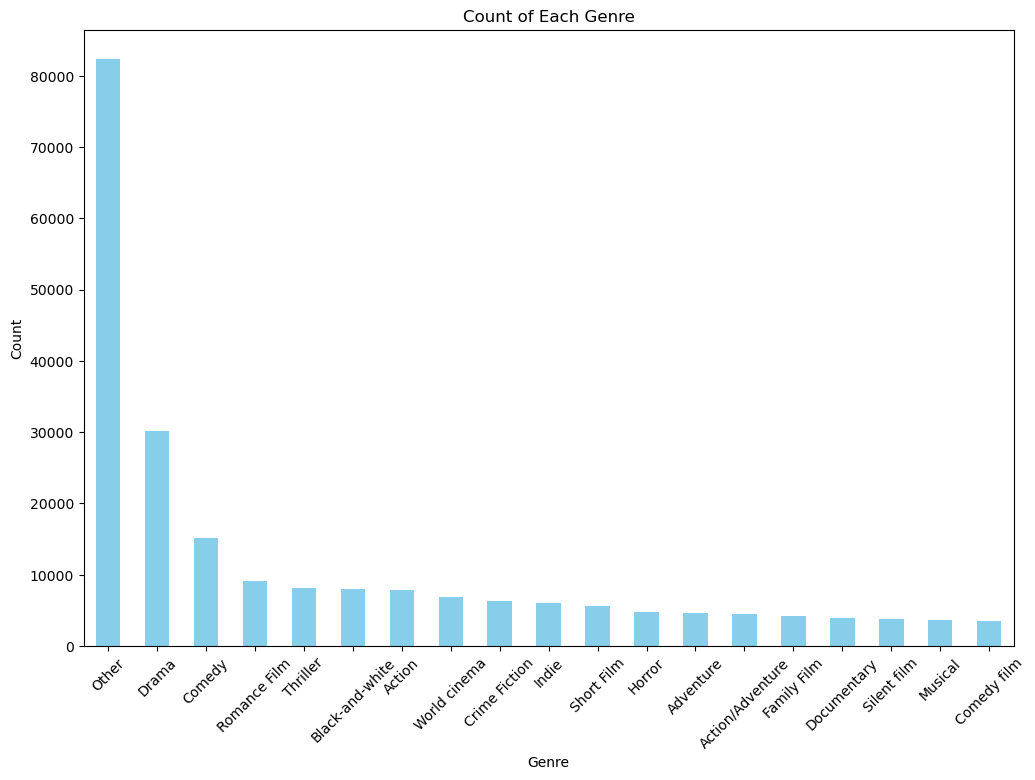

In [88]:
#There are too many catiegories, so we create an "other" one for the genres that are less frequent
threshold = genre_counts.sum() * 0.015
filtered_genres = genre_counts[genre_counts >= threshold]
other_count = genre_counts[genre_counts<threshold].sum()
filtered_genres['Other'] = other_count
filtered_genres = filtered_genres.sort_values(ascending=False)

# Plotting the number of movies in each genre
plt.figure(figsize=(12, 8))
filtered_genres.plot.bar(color='skyblue')
plt.title('Count of Each Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

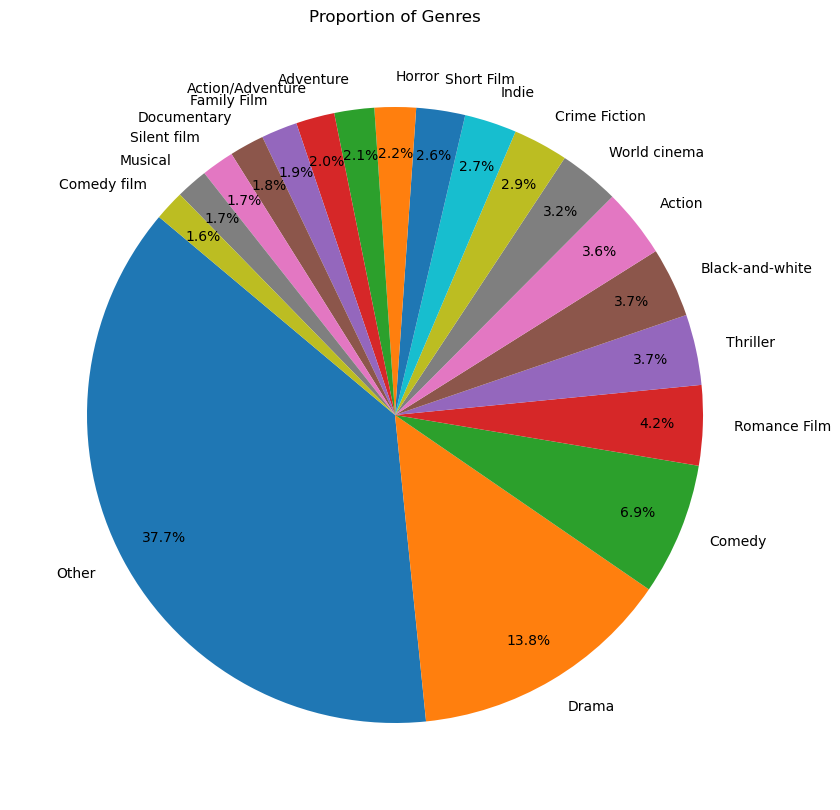

In [89]:
# Plotting the distribution of genres in a pie chart
plt.figure(figsize=(12, 10))
filtered_genres.plot.pie(autopct='%1.1f%%', startangle=140, pctdistance=0.85, labeldistance=1.1)
plt.title('Proportion of Genres')
plt.ylabel('')
plt.show()

# Box Office Revenue with Inflation

In [1]:
from typing import final

import pandas as pd
import numpy as np
from src.utils.data_utils import *
from matplotlib import pyplot as plt

In [2]:
final_dataset = pd.read_pickle('./data/OurFinalDataset.pkl')
final_dataset

,freebase_movie_id,movie_name,vote_average,vote_count,popularity,movie_countries_final,movie_genres_final,combined_release_date,Box_Office,imdb_id,avgRating,item_id,label
0,/m/03vyhn,Ghosts of Mars,5.127,977,14.189,United States of America,"Thriller, Science Fiction, Horror, Adventure, ...",2001-08-24,14010832.0,228333,2.35723,4735.0,0.351293
1,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,0.000,0,0.600,United States of America,"Mystery, Biographical film, Drama, Crime Drama",2000-02-16,NaN,245916,NaN,NaN,NaN
2,/m/0crgdbh,Brun bitter,0.000,0,0.898,Norway,"Crime Fiction, Drama",1988-11-17,NaN,094806,NaN,NaN,NaN
3,/m/0285_cd,White Of The Eye,5.742,64,8.297,United Kingdom,"Thriller, Erotic thriller, Psychological thriller",1987-06-19,NaN,094320,NaN,NaN,NaN
4,/m/01mrr1,A Woman in Flames,5.300,13,2.801,Germany,Drama,1983-05-11,NaN,083949,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67089,/m/0j7hxnt,Mermaids: The Body Found,4.500,20,2.728,United States of America,Drama,2011-03-19,NaN,816585,NaN,NaN,NaN
67090,/m/0g4pl34,Knuckle,5.700,28,1.656,"Ireland, United Kingdom","Biographical film, Drama, Documentary",2011-12-09,NaN,606259,NaN,NaN,NaN
67091,/m/02pygw1,Another Nice Mess,0.000,0,2.087,United States of America,"Satire, Comedy",1972-08-23,NaN,362411,0.00000,146598.0,0.600000
67092,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,0.000,0,0.600,Japan,"Science Fiction, Japanese Movies, Adventure, A...",1992-05-21,NaN,113726,NaN,NaN,NaN


In [3]:
# Specify the desired order of columns
desired_order = ['freebase_movie_id', 'imdb_id', 'item_id', 'movie_name', 'combined_release_date', 'movie_countries_final', 'movie_genres_final', 'Box_Office', 'label', 'avgRating', 'vote_average', 'vote_count', 'popularity']  # Replace with your column names

# Reorder the columns
final_dataset = final_dataset.reindex(columns=desired_order)
final_dataset

,freebase_movie_id,imdb_id,item_id,movie_name,combined_release_date,movie_countries_final,movie_genres_final,Box_Office,label,avgRating,vote_average,vote_count,popularity
0,/m/03vyhn,228333,4735.0,Ghosts of Mars,2001-08-24,United States of America,"Thriller, Science Fiction, Horror, Adventure, ...",14010832.0,0.351293,2.35723,5.127,977,14.189
1,/m/08yl5d,245916,NaN,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,United States of America,"Mystery, Biographical film, Drama, Crime Drama",NaN,NaN,NaN,0.000,0,0.600
2,/m/0crgdbh,094806,NaN,Brun bitter,1988-11-17,Norway,"Crime Fiction, Drama",NaN,NaN,NaN,0.000,0,0.898
3,/m/0285_cd,094320,NaN,White Of The Eye,1987-06-19,United Kingdom,"Thriller, Erotic thriller, Psychological thriller",NaN,NaN,NaN,5.742,64,8.297
4,/m/01mrr1,083949,NaN,A Woman in Flames,1983-05-11,Germany,Drama,NaN,NaN,NaN,5.300,13,2.801
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67089,/m/0j7hxnt,816585,NaN,Mermaids: The Body Found,2011-03-19,United States of America,Drama,NaN,NaN,NaN,4.500,20,2.728
67090,/m/0g4pl34,606259,NaN,Knuckle,2011-12-09,"Ireland, United Kingdom","Biographical film, Drama, Documentary",NaN,NaN,NaN,5.700,28,1.656
67091,/m/02pygw1,362411,146598.0,Another Nice Mess,1972-08-23,United States of America,"Satire, Comedy",NaN,0.600000,0.00000,0.000,0,2.087
67092,/m/03pcrp,113726,NaN,The Super Dimension Fortress Macross II: Lover...,1992-05-21,Japan,"Science Fiction, Japanese Movies, Adventure, A...",NaN,NaN,NaN,0.000,0,0.600


In [4]:
final_dataset.replace(0, np.nan, inplace=True)
final_dataset

,freebase_movie_id,imdb_id,item_id,movie_name,combined_release_date,movie_countries_final,movie_genres_final,Box_Office,label,avgRating,vote_average,vote_count,popularity
0,/m/03vyhn,228333,4735.0,Ghosts of Mars,2001-08-24,United States of America,"Thriller, Science Fiction, Horror, Adventure, ...",14010832.0,0.351293,2.35723,5.127,977.0,14.189
1,/m/08yl5d,245916,NaN,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,United States of America,"Mystery, Biographical film, Drama, Crime Drama",NaN,NaN,NaN,NaN,NaN,0.600
2,/m/0crgdbh,094806,NaN,Brun bitter,1988-11-17,Norway,"Crime Fiction, Drama",NaN,NaN,NaN,NaN,NaN,0.898
3,/m/0285_cd,094320,NaN,White Of The Eye,1987-06-19,United Kingdom,"Thriller, Erotic thriller, Psychological thriller",NaN,NaN,NaN,5.742,64.0,8.297
4,/m/01mrr1,083949,NaN,A Woman in Flames,1983-05-11,Germany,Drama,NaN,NaN,NaN,5.300,13.0,2.801
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67089,/m/0j7hxnt,816585,NaN,Mermaids: The Body Found,2011-03-19,United States of America,Drama,NaN,NaN,NaN,4.500,20.0,2.728
67090,/m/0g4pl34,606259,NaN,Knuckle,2011-12-09,"Ireland, United Kingdom","Biographical film, Drama, Documentary",NaN,NaN,NaN,5.700,28.0,1.656
67091,/m/02pygw1,362411,146598.0,Another Nice Mess,1972-08-23,United States of America,"Satire, Comedy",NaN,0.600000,NaN,NaN,NaN,2.087
67092,/m/03pcrp,113726,NaN,The Super Dimension Fortress Macross II: Lover...,1992-05-21,Japan,"Science Fiction, Japanese Movies, Adventure, A...",NaN,NaN,NaN,NaN,NaN,0.600


In [5]:
final_dataset.isna().sum()

freebase_movie_id            0
imdb_id                      0
item_id                  52483
movie_name                   0
combined_release_date        0
movie_countries_final        0
movie_genres_final           0
Box_Office               55286
label                    55000
avgRating                53436
vote_average              9794
vote_count                9803
popularity                 120
dtype: int64

In [6]:
final_dataset[final_dataset['popularity'].isna()]

,freebase_movie_id,imdb_id,item_id,movie_name,combined_release_date,movie_countries_final,movie_genres_final,Box_Office,label,avgRating,vote_average,vote_count,popularity
935,/m/07h8ns,340788,NaN,The Jedi Hunter,2002-08-30,United States of America,"Short Film, Fan film, Indie",NaN,NaN,NaN,NaN,NaN,NaN
1060,/m/0jt2j85,319050,NaN,Seeds of Arkham,2011-10-11,United States of America,"Short Film, Fan film, Action",NaN,NaN,NaN,NaN,NaN,NaN
1481,/m/0kvg3q,245959,NaN,I Love You,1979-06-01,India,"Romance Film, Drama",NaN,NaN,NaN,NaN,NaN,NaN
1658,/m/05zpxsc,429969,NaN,De damescoupeur,1919-10-31,Netherlands,"Silent film, Comedy film",NaN,NaN,NaN,NaN,NaN,NaN
2245,/m/0gx06gh,185313,NaN,The Flat,1921-03-01,United Kingdom,"Silent film, Drama",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64359,/m/0478z11,343710,NaN,Get-Rich-Quick Wallingford,1916-01-31,Australia,"Silent film, Comedy, Black-and-white",NaN,NaN,NaN,NaN,NaN,NaN
64449,/m/047s_fg,239428,NaN,The Butler's in Love,2008-06-23,United States of America,Short Film,NaN,NaN,NaN,NaN,NaN,NaN
64535,/m/0g9y47z,028681,NaN,Calling All Stars,1937-03-01,United Kingdom,"Musical, Comedy film",NaN,NaN,NaN,NaN,NaN,NaN
65006,/m/0gj9y60,170225,NaN,Martins Tagebuch,1955-01-01,German Democratic Republic,"Short Film, Documentary",NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
final_dataset.dropna(subset=['popularity'], inplace=True)

In [8]:
final_dataset.isna().sum()

freebase_movie_id            0
imdb_id                      0
item_id                  52369
movie_name                   0
combined_release_date        0
movie_countries_final        0
movie_genres_final           0
Box_Office               55167
label                    54885
avgRating                53322
vote_average              9678
vote_count                9687
popularity                   0
dtype: int64

In [9]:
# We don't have information about inflation before 1913, so we will apply the 1913 inflation rates to the oldest movies
final_dataset['adjusted_release_date'] = final_dataset['combined_release_date'].apply(inflation_date_constraint)
final_dataset

,freebase_movie_id,imdb_id,item_id,movie_name,combined_release_date,movie_countries_final,movie_genres_final,Box_Office,label,avgRating,vote_average,vote_count,popularity,adjusted_release_date
0,/m/03vyhn,228333,4735.0,Ghosts of Mars,2001-08-24,United States of America,"Thriller, Science Fiction, Horror, Adventure, ...",14010832.0,0.351293,2.35723,5.127,977.0,14.189,2001-08-24
1,/m/08yl5d,245916,NaN,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,United States of America,"Mystery, Biographical film, Drama, Crime Drama",NaN,NaN,NaN,NaN,NaN,0.600,2000-02-16
2,/m/0crgdbh,094806,NaN,Brun bitter,1988-11-17,Norway,"Crime Fiction, Drama",NaN,NaN,NaN,NaN,NaN,0.898,1988-11-17
3,/m/0285_cd,094320,NaN,White Of The Eye,1987-06-19,United Kingdom,"Thriller, Erotic thriller, Psychological thriller",NaN,NaN,NaN,5.742,64.0,8.297,1987-06-19
4,/m/01mrr1,083949,NaN,A Woman in Flames,1983-05-11,Germany,Drama,NaN,NaN,NaN,5.300,13.0,2.801,1983-05-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67089,/m/0j7hxnt,816585,NaN,Mermaids: The Body Found,2011-03-19,United States of America,Drama,NaN,NaN,NaN,4.500,20.0,2.728,2011-03-19
67090,/m/0g4pl34,606259,NaN,Knuckle,2011-12-09,"Ireland, United Kingdom","Biographical film, Drama, Documentary",NaN,NaN,NaN,5.700,28.0,1.656,2011-12-09
67091,/m/02pygw1,362411,146598.0,Another Nice Mess,1972-08-23,United States of America,"Satire, Comedy",NaN,0.600000,NaN,NaN,NaN,2.087,1972-08-23
67092,/m/03pcrp,113726,NaN,The Super Dimension Fortress Macross II: Lover...,1992-05-21,Japan,"Science Fiction, Japanese Movies, Adventure, A...",NaN,NaN,NaN,NaN,NaN,0.600,1992-05-21


In [ ]:
import cpi
from tqdm import tqdm

cpi.update()

# Our column is already in datetime format, but we doublecheck
final_dataset['combined_release_date'] = pd.to_datetime(final_dataset['combined_release_date'], errors='coerce')

# We are going to adjust the inflation to the latest year in the dataset so we have a comparable metric
max_year = final_dataset['adjusted_release_date'].dt.year.max()

# It takes time so we use tqdm to show the progress
tqdm.pandas()

# We compute the inflation adjusted box office revenue and skip the NaN values
final_dataset['inflation_adjusted_box_office_revenue']=final_dataset.progress_apply(
    lambda r: cpi.inflate(r['Box_Office'], r['adjusted_release_date'].year, to=max_year) if pd.notna(r['Box_Office']) else np.nan,
    axis=1
)
# We directly save the dataset to a pickle file because the conversion takes 30 min
final_dataset.to_pickle('./data/Box_Office_Inflation.pkl')

In [12]:
final_dataset

,freebase_movie_id,imdb_id,item_id,movie_name,combined_release_date,movie_countries_final,movie_genres_final,Box_Office,label,avgRating,vote_average,vote_count,popularity,adjusted_release_date
0,/m/03vyhn,228333,4735.0,Ghosts of Mars,2001-08-24,United States of America,"Thriller, Science Fiction, Horror, Adventure, ...",14010832.0,0.351293,2.35723,5.127,977.0,14.189,2001-08-24
1,/m/08yl5d,245916,NaN,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,United States of America,"Mystery, Biographical film, Drama, Crime Drama",NaN,NaN,NaN,NaN,NaN,0.600,2000-02-16
2,/m/0crgdbh,094806,NaN,Brun bitter,1988-11-17,Norway,"Crime Fiction, Drama",NaN,NaN,NaN,NaN,NaN,0.898,1988-11-17
3,/m/0285_cd,094320,NaN,White Of The Eye,1987-06-19,United Kingdom,"Thriller, Erotic thriller, Psychological thriller",NaN,NaN,NaN,5.742,64.0,8.297,1987-06-19
4,/m/01mrr1,083949,NaN,A Woman in Flames,1983-05-11,Germany,Drama,NaN,NaN,NaN,5.300,13.0,2.801,1983-05-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67089,/m/0j7hxnt,816585,NaN,Mermaids: The Body Found,2011-03-19,United States of America,Drama,NaN,NaN,NaN,4.500,20.0,2.728,2011-03-19
67090,/m/0g4pl34,606259,NaN,Knuckle,2011-12-09,"Ireland, United Kingdom","Biographical film, Drama, Documentary",NaN,NaN,NaN,5.700,28.0,1.656,2011-12-09
67091,/m/02pygw1,362411,146598.0,Another Nice Mess,1972-08-23,United States of America,"Satire, Comedy",NaN,0.600000,NaN,NaN,NaN,2.087,1972-08-23
67092,/m/03pcrp,113726,NaN,The Super Dimension Fortress Macross II: Lover...,1992-05-21,Japan,"Science Fiction, Japanese Movies, Adventure, A...",NaN,NaN,NaN,NaN,NaN,0.600,1992-05-21


# Popularity Metric

In [13]:
from typing import final

import pandas as pd
import numpy as np
from src.utils.data_utils import *
from matplotlib import pyplot as plt

In [14]:
data_box_office = pd.read_pickle('./data/Box_Office_Inflation.pkl')
data_box_office

,freebase_movie_id,imdb_id,item_id,movie_name,combined_release_date,movie_countries_final,movie_genres_final,Box_Office,label,avgRating,vote_average,vote_count,popularity,adjusted_release_date,inflation_adjusted_box_office_revenue
0,/m/03vyhn,228333,4735.0,Ghosts of Mars,2001-08-24,United States of America,"Thriller, Science Fiction, Horror, Adventure, ...",14010832.0,0.351293,2.35723,5.127,977.0,14.189,2001-08-24,2.315268e+07
1,/m/08yl5d,245916,NaN,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,United States of America,"Mystery, Biographical film, Drama, Crime Drama",NaN,NaN,NaN,NaN,NaN,0.600,2000-02-16,NaN
2,/m/0crgdbh,094806,NaN,Brun bitter,1988-11-17,Norway,"Crime Fiction, Drama",NaN,NaN,NaN,NaN,NaN,0.898,1988-11-17,NaN
3,/m/0285_cd,094320,NaN,White Of The Eye,1987-06-19,United Kingdom,"Thriller, Erotic thriller, Psychological thriller",NaN,NaN,NaN,5.742,64.0,8.297,1987-06-19,NaN
4,/m/01mrr1,083949,NaN,A Woman in Flames,1983-05-11,Germany,Drama,NaN,NaN,NaN,5.300,13.0,2.801,1983-05-11,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67089,/m/0j7hxnt,816585,NaN,Mermaids: The Body Found,2011-03-19,United States of America,Drama,NaN,NaN,NaN,4.500,20.0,2.728,2011-03-19,NaN
67090,/m/0g4pl34,606259,NaN,Knuckle,2011-12-09,"Ireland, United Kingdom","Biographical film, Drama, Documentary",NaN,NaN,NaN,5.700,28.0,1.656,2011-12-09,NaN
67091,/m/02pygw1,362411,146598.0,Another Nice Mess,1972-08-23,United States of America,"Satire, Comedy",NaN,0.600000,NaN,NaN,NaN,2.087,1972-08-23,NaN
67092,/m/03pcrp,113726,NaN,The Super Dimension Fortress Macross II: Lover...,1992-05-21,Japan,"Science Fiction, Japanese Movies, Adventure, A...",NaN,NaN,NaN,NaN,NaN,0.600,1992-05-21,NaN


In [15]:
# Adjust the columns order
desired_order = ['freebase_movie_id', 'imdb_id', 'item_id', 'movie_name', 'combined_release_date',  'Box_Office', 'inflation_adjusted_box_office_revenue','movie_countries_final', 'movie_genres_final', 'label', 'avgRating', 'vote_average', 'vote_count', 'popularity']
data_box_office = data_box_office.reindex(columns=desired_order)
data_box_office

,freebase_movie_id,imdb_id,item_id,movie_name,combined_release_date,Box_Office,inflation_adjusted_box_office_revenue,movie_countries_final,movie_genres_final,label,avgRating,vote_average,vote_count,popularity
0,/m/03vyhn,228333,4735.0,Ghosts of Mars,2001-08-24,14010832.0,2.315268e+07,United States of America,"Thriller, Science Fiction, Horror, Adventure, ...",0.351293,2.35723,5.127,977.0,14.189
1,/m/08yl5d,245916,NaN,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,NaN,United States of America,"Mystery, Biographical film, Drama, Crime Drama",NaN,NaN,NaN,NaN,0.600
2,/m/0crgdbh,094806,NaN,Brun bitter,1988-11-17,NaN,NaN,Norway,"Crime Fiction, Drama",NaN,NaN,NaN,NaN,0.898
3,/m/0285_cd,094320,NaN,White Of The Eye,1987-06-19,NaN,NaN,United Kingdom,"Thriller, Erotic thriller, Psychological thriller",NaN,NaN,5.742,64.0,8.297
4,/m/01mrr1,083949,NaN,A Woman in Flames,1983-05-11,NaN,NaN,Germany,Drama,NaN,NaN,5.300,13.0,2.801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67089,/m/0j7hxnt,816585,NaN,Mermaids: The Body Found,2011-03-19,NaN,NaN,United States of America,Drama,NaN,NaN,4.500,20.0,2.728
67090,/m/0g4pl34,606259,NaN,Knuckle,2011-12-09,NaN,NaN,"Ireland, United Kingdom","Biographical film, Drama, Documentary",NaN,NaN,5.700,28.0,1.656
67091,/m/02pygw1,362411,146598.0,Another Nice Mess,1972-08-23,NaN,NaN,United States of America,"Satire, Comedy",0.600000,NaN,NaN,NaN,2.087
67092,/m/03pcrp,113726,NaN,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,NaN,Japan,"Science Fiction, Japanese Movies, Adventure, A...",NaN,NaN,NaN,NaN,0.600


In [16]:
# Compute the genre fame in our dataset
data_box_office['movie_genres_final'] = data_box_office['movie_genres_final'].apply(lambda x: x.split(', ') if isinstance(x, str) else x)
df_genres = data_box_office.explode('movie_genres_final')
genre_counts = df_genres['movie_genres_final'].value_counts()
genre_counts

movie_genres_final
Drama              30088
Comedy             15138
Romance Film        9156
Thriller            8073
Black-and-white     7977
                   ...  
Linguistics            1
Comdedy                1
Revenge                1
Neorealism             1
Homoeroticism          1
Name: count, Length: 366, dtype: int64

In [17]:
# Compute the fame of each movie
def calculate_genre_popularity(genres):
    if isinstance(genres, list):
        return sum(genre_counts.get(genre, 0) for genre in genres) / len(genres)
    return 0
data_box_office['genre_popularity'] = data_box_office['movie_genres_final'].apply(calculate_genre_popularity)
data_box_office

,freebase_movie_id,imdb_id,item_id,movie_name,combined_release_date,Box_Office,inflation_adjusted_box_office_revenue,movie_countries_final,movie_genres_final,label,avgRating,vote_average,vote_count,popularity,genre_popularity
0,/m/03vyhn,228333,4735.0,Ghosts of Mars,2001-08-24,14010832.0,2.315268e+07,United States of America,"[Thriller, Science Fiction, Horror, Adventure,...",0.351293,2.35723,5.127,977.0,14.189,4089.571429
1,/m/08yl5d,245916,NaN,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,NaN,United States of America,"[Mystery, Biographical film, Drama, Crime Drama]",NaN,NaN,NaN,NaN,0.600,8655.500000
2,/m/0crgdbh,094806,NaN,Brun bitter,1988-11-17,NaN,NaN,Norway,"[Crime Fiction, Drama]",NaN,NaN,NaN,NaN,0.898,18193.000000
3,/m/0285_cd,094320,NaN,White Of The Eye,1987-06-19,NaN,NaN,United Kingdom,"[Thriller, Erotic thriller, Psychological thri...",NaN,NaN,5.742,64.0,8.297,3181.666667
4,/m/01mrr1,083949,NaN,A Woman in Flames,1983-05-11,NaN,NaN,Germany,[Drama],NaN,NaN,5.300,13.0,2.801,30088.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67089,/m/0j7hxnt,816585,NaN,Mermaids: The Body Found,2011-03-19,NaN,NaN,United States of America,[Drama],NaN,NaN,4.500,20.0,2.728,30088.000000
67090,/m/0g4pl34,606259,NaN,Knuckle,2011-12-09,NaN,NaN,"Ireland, United Kingdom","[Biographical film, Drama, Documentary]",NaN,NaN,5.700,28.0,1.656,11698.000000
67091,/m/02pygw1,362411,146598.0,Another Nice Mess,1972-08-23,NaN,NaN,United States of America,"[Satire, Comedy]",0.600000,NaN,NaN,NaN,2.087,7911.500000
67092,/m/03pcrp,113726,NaN,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,NaN,Japan,"[Science Fiction, Japanese Movies, Adventure, ...",NaN,NaN,NaN,NaN,0.600,6897.714286


In [18]:
top_10_popular_movies = data_box_office.sort_values(by='popularity', ascending=False)

In [19]:
top_10_popular_movies

,freebase_movie_id,imdb_id,item_id,movie_name,combined_release_date,Box_Office,inflation_adjusted_box_office_revenue,movie_countries_final,movie_genres_final,label,avgRating,vote_average,vote_count,popularity,genre_popularity
64821,/m/01n910,087985,NaN,Red Dawn,1984-08-10,4.000000e+07,1.126679e+08,United States of America,"[Thriller, Cold War, Action/Adventure, Drama, ...",NaN,NaN,6.272,691.0,300.738,6754.750000
42148,/m/0gmbk1g,630029,NaN,Avatar 2,2022-12-14,2.320250e+09,2.320250e+09,United States of America,"[Science Fiction, Action, Fantasy, Adventure]",NaN,NaN,7.654,9830.0,241.285,4441.000000
62959,/m/0gdpng,104014,154996.0,All Ladies Do It,1992-02-21,NaN,NaN,Italy,"[Softcore Porn, Comedy, World cinema, Adult]",0.777778,3.42308,4.800,335.0,232.565,5574.250000
4726,/m/03m9db,283877,27473.0,American Psycho 2,2002-04-22,NaN,NaN,United States of America,"[Thriller, Horror, Slasher, Psychological thri...",0.257778,1.98768,4.500,353.0,225.504,3700.500000
58645,/m/03176f,241527,4896.0,Harry Potter and the Philosopher's Stone,2001-11-16,9.747554e+08,1.610768e+09,"United States of America, United Kingdom","[Fantasy Adventure, Adventure, Children's/Fami...",0.639775,3.68820,7.916,25379.0,185.482,1808.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66970,/m/057hbx1,049415,NaN,Garbage Dreams,2009-07-31,NaN,NaN,United States of America,"[Short Film, World cinema, Documentary]",NaN,NaN,6.400,5.0,0.600,5487.000000
42,/m/03cfwy4,004604,NaN,The Sky Pirate,1914-07-18,NaN,NaN,United States of America,"[Silent film, Adventure, Black-and-white, Shor...",NaN,NaN,NaN,NaN,0.600,10431.142857
21258,/m/06s9kc,096382,NaN,Victim of the Brain,1988-01-01,NaN,NaN,Netherlands,[Docudrama],NaN,NaN,NaN,NaN,0.600,399.000000
21259,/m/04jbm2h,257933,NaN,Moodal Manju,1970-01-09,NaN,NaN,India,"[Drama, Music]",NaN,NaN,NaN,NaN,0.600,15459.500000


In [21]:
# We normalize the columns we are going to use to compute our success metric using a scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns_to_normalize = ['avgRating', 'vote_average', 'popularity', 'Box_Office', 'inflation_adjusted_box_office_revenue', 'genre_popularity']
data_box_office[columns_to_normalize] = scaler.fit_transform(data_box_office[columns_to_normalize])
data_box_office.isna().sum()

freebase_movie_id                            0
imdb_id                                      0
item_id                                  52369
movie_name                                   0
combined_release_date                        0
Box_Office                               55167
inflation_adjusted_box_office_revenue    55167
movie_countries_final                        0
movie_genres_final                           0
label                                    54885
avgRating                                53322
vote_average                              9678
vote_count                                9687
popularity                                   0
genre_popularity                             0
dtype: int64

In [22]:
data_box_office=data_box_office.drop(columns=['vote_count'])
data_box_office

,freebase_movie_id,imdb_id,item_id,movie_name,combined_release_date,Box_Office,inflation_adjusted_box_office_revenue,movie_countries_final,movie_genres_final,label,avgRating,vote_average,popularity,genre_popularity
0,/m/03vyhn,228333,4735.0,Ghosts of Mars,2001-08-24,0.005036,0.002739,United States of America,"[Thriller, Science Fiction, Horror, Adventure,...",0.351293,0.412718,0.487053,0.045276,0.135777
1,/m/08yl5d,245916,NaN,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,NaN,United States of America,"[Mystery, Biographical film, Drama, Crime Drama]",NaN,NaN,NaN,0.000000,0.287554
2,/m/0crgdbh,094806,NaN,Brun bitter,1988-11-17,NaN,NaN,Norway,"[Crime Fiction, Drama]",NaN,NaN,NaN,0.000993,0.604594
3,/m/0285_cd,094320,NaN,White Of The Eye,1987-06-19,NaN,NaN,United Kingdom,"[Thriller, Erotic thriller, Psychological thri...",NaN,NaN,0.551789,0.025645,0.105597
4,/m/01mrr1,083949,NaN,A Woman in Flames,1983-05-11,NaN,NaN,Germany,[Drama],NaN,NaN,0.505263,0.007333,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67089,/m/0j7hxnt,816585,NaN,Mermaids: The Body Found,2011-03-19,NaN,NaN,United States of America,[Drama],NaN,NaN,0.421053,0.007090,1.000000
67090,/m/0g4pl34,606259,NaN,Knuckle,2011-12-09,NaN,NaN,"Ireland, United Kingdom","[Biographical film, Drama, Documentary]",NaN,NaN,0.547368,0.003518,0.388691
67091,/m/02pygw1,362411,146598.0,Another Nice Mess,1972-08-23,NaN,NaN,United States of America,"[Satire, Comedy]",0.600000,NaN,NaN,0.004954,0.262823
67092,/m/03pcrp,113726,NaN,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,NaN,Japan,"[Science Fiction, Japanese Movies, Adventure, ...",NaN,NaN,NaN,0.000000,0.229123


In [23]:
top_10_popular_movies = data_box_office.sort_values(by='popularity', ascending=False)
top_10_popular_movies

,freebase_movie_id,imdb_id,item_id,movie_name,combined_release_date,Box_Office,inflation_adjusted_box_office_revenue,movie_countries_final,movie_genres_final,label,avgRating,vote_average,popularity,genre_popularity
64821,/m/01n910,087985,NaN,Red Dawn,1984-08-10,0.014377,0.013326,United States of America,"[Thriller, Cold War, Action/Adventure, Drama, ...",NaN,NaN,0.607579,1.000000,0.224371
42148,/m/0gmbk1g,630029,NaN,Avatar 2,2022-12-14,0.833940,0.274440,United States of America,"[Science Fiction, Action, Fantasy, Adventure]",NaN,NaN,0.753053,0.801914,0.147459
62959,/m/0gdpng,104014,154996.0,All Ladies Do It,1992-02-21,NaN,NaN,Italy,"[Softcore Porn, Comedy, World cinema, Adult]",0.777778,0.649573,0.452632,0.772861,0.185129
4726,/m/03m9db,283877,27473.0,American Psycho 2,2002-04-22,NaN,NaN,United States of America,"[Thriller, Horror, Slasher, Psychological thri...",0.257778,0.330596,0.421053,0.749335,0.122843
58645,/m/03176f,241527,4896.0,Harry Potter and the Philosopher's Stone,2001-11-16,0.350345,0.190522,"United States of America, United Kingdom","[Fantasy Adventure, Adventure, Children's/Fami...",0.639775,0.708489,0.780632,0.615990,0.059948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66970,/m/057hbx1,049415,NaN,Garbage Dreams,2009-07-31,NaN,NaN,United States of America,"[Short Film, World cinema, Documentary]",NaN,NaN,0.621053,0.000000,0.182229
42,/m/03cfwy4,004604,NaN,The Sky Pirate,1914-07-18,NaN,NaN,United States of America,"[Silent film, Adventure, Black-and-white, Shor...",NaN,NaN,NaN,0.000000,0.346579
21258,/m/06s9kc,096382,NaN,Victim of the Brain,1988-01-01,NaN,NaN,Netherlands,[Docudrama],NaN,NaN,NaN,0.000000,0.013097
21259,/m/04jbm2h,257933,NaN,Moodal Manju,1970-01-09,NaN,NaN,India,"[Drama, Music]",NaN,NaN,NaN,0.000000,0.513729


In [24]:
data_box_office['avgRating_safe'] = data_box_office['avgRating'].combine_first(data_box_office['vote_average'])
data_box_office['vote_safe'] = data_box_office['vote_average'].combine_first(data_box_office['avgRating'])
data_box_office['avgRating_safe'].fillna(0, inplace=True)
data_box_office['vote_safe'].fillna(0, inplace=True)
data_box_office['rating'] = 0.5 * (data_box_office['avgRating_safe'] + data_box_office['vote_safe'])
data_box_office.drop(columns=['avgRating', 'vote_average', 'avgRating_safe', 'vote_safe'], inplace=True)
data_box_office

/var/folders/ft/f5drds915nl_7p2g4tg67z840000gn/T/ipykernel_9964/776840887.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_box_office['avgRating_safe'].fillna(0, inplace=True)
/var/folders/ft/f5drds915nl_7p2g4tg67z840000gn/T/ipykernel_9964/776840887.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

,freebase_movie_id,imdb_id,item_id,movie_name,combined_release_date,Box_Office,inflation_adjusted_box_office_revenue,movie_countries_final,movie_genres_final,label,popularity,genre_popularity,rating
0,/m/03vyhn,228333,4735.0,Ghosts of Mars,2001-08-24,0.005036,0.002739,United States of America,"[Thriller, Science Fiction, Horror, Adventure,...",0.351293,0.045276,0.135777,0.449885
1,/m/08yl5d,245916,NaN,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,NaN,United States of America,"[Mystery, Biographical film, Drama, Crime Drama]",NaN,0.000000,0.287554,0.000000
2,/m/0crgdbh,094806,NaN,Brun bitter,1988-11-17,NaN,NaN,Norway,"[Crime Fiction, Drama]",NaN,0.000993,0.604594,0.000000
3,/m/0285_cd,094320,NaN,White Of The Eye,1987-06-19,NaN,NaN,United Kingdom,"[Thriller, Erotic thriller, Psychological thri...",NaN,0.025645,0.105597,0.551789
4,/m/01mrr1,083949,NaN,A Woman in Flames,1983-05-11,NaN,NaN,Germany,[Drama],NaN,0.007333,1.000000,0.505263
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67089,/m/0j7hxnt,816585,NaN,Mermaids: The Body Found,2011-03-19,NaN,NaN,United States of America,[Drama],NaN,0.007090,1.000000,0.421053
67090,/m/0g4pl34,606259,NaN,Knuckle,2011-12-09,NaN,NaN,"Ireland, United Kingdom","[Biographical film, Drama, Documentary]",NaN,0.003518,0.388691,0.547368
67091,/m/02pygw1,362411,146598.0,Another Nice Mess,1972-08-23,NaN,NaN,United States of America,"[Satire, Comedy]",0.600000,0.004954,0.262823,0.000000
67092,/m/03pcrp,113726,NaN,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,NaN,Japan,"[Science Fiction, Japanese Movies, Adventure, ...",NaN,0.000000,0.229123,0.000000


In [25]:
# Replace 0 with NaN in the 'popularity' and 'rating' columns
data_box_office['rating'] = data_box_office['rating'].replace(0, np.nan)
data_box_office

,freebase_movie_id,imdb_id,item_id,movie_name,combined_release_date,Box_Office,inflation_adjusted_box_office_revenue,movie_countries_final,movie_genres_final,label,popularity,genre_popularity,rating
0,/m/03vyhn,228333,4735.0,Ghosts of Mars,2001-08-24,0.005036,0.002739,United States of America,"[Thriller, Science Fiction, Horror, Adventure,...",0.351293,0.045276,0.135777,0.449885
1,/m/08yl5d,245916,NaN,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,NaN,United States of America,"[Mystery, Biographical film, Drama, Crime Drama]",NaN,0.000000,0.287554,NaN
2,/m/0crgdbh,094806,NaN,Brun bitter,1988-11-17,NaN,NaN,Norway,"[Crime Fiction, Drama]",NaN,0.000993,0.604594,NaN
3,/m/0285_cd,094320,NaN,White Of The Eye,1987-06-19,NaN,NaN,United Kingdom,"[Thriller, Erotic thriller, Psychological thri...",NaN,0.025645,0.105597,0.551789
4,/m/01mrr1,083949,NaN,A Woman in Flames,1983-05-11,NaN,NaN,Germany,[Drama],NaN,0.007333,1.000000,0.505263
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67089,/m/0j7hxnt,816585,NaN,Mermaids: The Body Found,2011-03-19,NaN,NaN,United States of America,[Drama],NaN,0.007090,1.000000,0.421053
67090,/m/0g4pl34,606259,NaN,Knuckle,2011-12-09,NaN,NaN,"Ireland, United Kingdom","[Biographical film, Drama, Documentary]",NaN,0.003518,0.388691,0.547368
67091,/m/02pygw1,362411,146598.0,Another Nice Mess,1972-08-23,NaN,NaN,United States of America,"[Satire, Comedy]",0.600000,0.004954,0.262823,NaN
67092,/m/03pcrp,113726,NaN,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,NaN,Japan,"[Science Fiction, Japanese Movies, Adventure, ...",NaN,0.000000,0.229123,NaN


In [26]:
data_box_office.isna().sum()

freebase_movie_id                            0
imdb_id                                      0
item_id                                  52369
movie_name                                   0
combined_release_date                        0
Box_Office                               55167
inflation_adjusted_box_office_revenue    55167
movie_countries_final                        0
movie_genres_final                           0
label                                    54885
popularity                                   0
genre_popularity                             0
rating                                    9587
dtype: int64

In [27]:
top_10_popular_movies = data_box_office.sort_values(by='inflation_adjusted_box_office_revenue', ascending=False)
top_10_popular_movies

,freebase_movie_id,imdb_id,item_id,movie_name,combined_release_date,Box_Office,inflation_adjusted_box_office_revenue,movie_countries_final,movie_genres_final,label,popularity,genre_popularity,rating
9888,/m/0k4d7,029583,NaN,Snow White and the Seven Dwarfs,1937-12-21,0.149518,1.000000,United States of America,"[Romance Film, Musical, Fantasy, Family Film, ...",NaN,0.175229,0.148855,0.696421
30973,/m/083skw,031381,NaN,Gone with the Wind,1939-12-15,0.143767,0.996126,United States of America,"[Film adaptation, Costume drama, Roadshow thea...",NaN,0.154092,0.180497,0.785789
59814,/m/05jc7z,038991,NaN,The Stranger,1946-07-02,0.115733,0.571598,United States of America,"[Thriller, Mystery, Drama, Psychological thril...",NaN,0.036330,0.285690,0.710632
1036,/m/04j1zjw,034492,NaN,Bambi,1942-08-14,0.096125,0.567962,United States of America,"[Adventure, Children's/Family, Animation, Comi...",NaN,0.142904,0.171075,0.684211
18216,/m/0dr_4,120338,1721.0,Titanic,1997-11-18,0.785462,0.471324,United States of America,"[Tragedy, Costume drama, Historical fiction, A...",0.592075,0.339004,0.184327,0.714080
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67089,/m/0j7hxnt,816585,NaN,Mermaids: The Body Found,2011-03-19,NaN,NaN,United States of America,[Drama],NaN,0.007090,1.000000,0.421053
67090,/m/0g4pl34,606259,NaN,Knuckle,2011-12-09,NaN,NaN,"Ireland, United Kingdom","[Biographical film, Drama, Documentary]",NaN,0.003518,0.388691,0.547368
67091,/m/02pygw1,362411,146598.0,Another Nice Mess,1972-08-23,NaN,NaN,United States of America,"[Satire, Comedy]",0.600000,0.004954,0.262823,NaN
67092,/m/03pcrp,113726,NaN,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,NaN,Japan,"[Science Fiction, Japanese Movies, Adventure, ...",NaN,0.000000,0.229123,NaN


In [31]:
# Defining our metric by assigning weights to the attributes we are going to use and perform the calculation on each row
weights={'popularity': 8, 'inflation_adjusted_box_office_revenue': 5,'label': 3,'rating': 3,'genre_popularity': 1}
def calculate_success_metric(row, weights):
    available_weights = {k: v for k, v in weights.items() if pd.notna(row[k])}
    total_weight = sum(available_weights.values())
    return sum(row[k] * (v / total_weight) for k, v in available_weights.items())
data_box_office['Success_metric'] = data_box_office.apply(calculate_success_metric,axis=1,weights=weights)

In [32]:
top_10_popular_movies = data_box_office.sort_values(by='Success_metric', ascending=False)
top_10_popular_movies

,freebase_movie_id,imdb_id,item_id,movie_name,combined_release_date,Box_Office,inflation_adjusted_box_office_revenue,movie_countries_final,movie_genres_final,label,popularity,genre_popularity,rating,Success_metric
62959,/m/0gdpng,104014,154996.0,All Ladies Do It,1992-02-21,NaN,NaN,Italy,"[Softcore Porn, Comedy, World cinema, Adult]",0.777778,0.772861,0.185129,0.551102,0.690311
42148,/m/0gmbk1g,630029,NaN,Avatar 2,2022-12-14,0.833940,0.274440,United States of America,"[Science Fiction, Action, Fantasy, Adventure]",NaN,0.801914,0.147459,0.753053,0.599655
64821,/m/01n910,087985,NaN,Red Dawn,1984-08-10,0.014377,0.013326,United States of America,"[Thriller, Cold War, Action/Adventure, Drama, ...",NaN,1.000000,0.224371,0.607579,0.594926
4726,/m/03m9db,283877,27473.0,American Psycho 2,2002-04-22,NaN,NaN,United States of America,"[Thriller, Horror, Slasher, Psychological thri...",0.257778,0.749335,0.122843,0.375824,0.534555
30973,/m/083skw,031381,NaN,Gone with the Wind,1939-12-15,0.143767,0.996126,United States of America,"[Film adaptation, Costume drama, Roadshow thea...",NaN,0.154092,0.180497,0.785789,0.514779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52149,/m/0bh9_zb,019960,NaN,Saat Bhai Champa,1968-03-28,NaN,NaN,"Bangladesh, India",[Fairy tale],NaN,0.000000,0.001828,NaN,0.000203
21531,/m/04n051,432462,NaN,Agent Orange,2004-11-16,NaN,NaN,United States of America,[Dogme 95],NaN,0.000000,0.000698,NaN,0.000078
529,/m/06zsxx8,304628,NaN,Resin,2001-08-22,NaN,NaN,United States of America,[Dogme 95],NaN,0.000000,0.000698,NaN,0.000078
20954,/m/02r1ff8,155863,NaN,Mattoru Seetha,1975-10-17,NaN,NaN,India,[Feature film],NaN,0.000003,0.000266,NaN,0.000033


In [33]:
# Remove movies with a Success_metric of 0
data_box_office = data_box_office[data_box_office['Success_metric'] != 0]

# Verify the removal
print(data_box_office['Success_metric'].describe())

count    66973.000000
mean         0.165851
std          0.073295
min          0.000033
25%          0.128434
50%          0.169533
75%          0.207888
max          0.690311
Name: Success_metric, dtype: float64


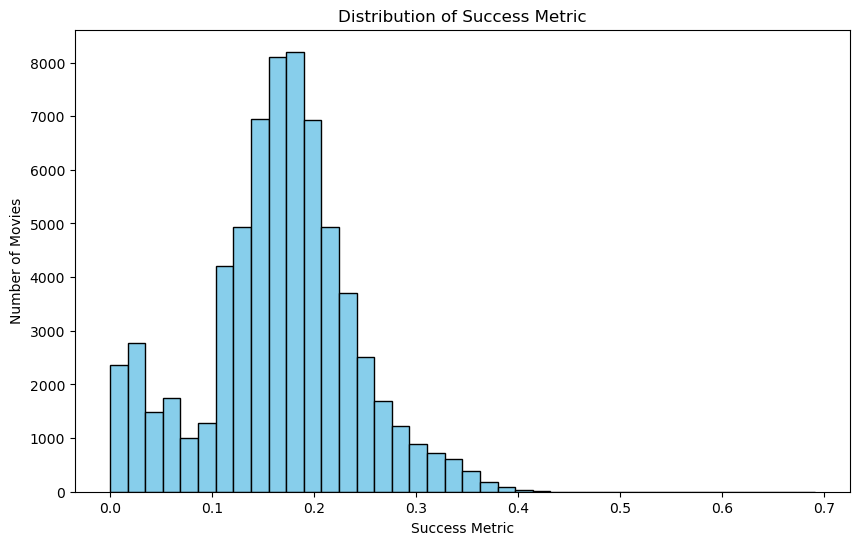

In [34]:
import matplotlib.pyplot as plt

# Create a histogram of the Success_metric
plt.figure(figsize=(10, 6))
plt.hist(data_box_office['Success_metric'].dropna(), bins=40, color='skyblue', edgecolor='black')

# Set the title and labels
plt.title('Distribution of Success Metric')
plt.xlabel('Success Metric')
plt.ylabel('Number of Movies')

# Show the plot
plt.show()

In [35]:
# Ensure that the genres column contains a list
data_box_office['movie_genres_final'] = data_box_office['movie_genres_final'].apply(lambda x: x.split(', ') if isinstance(x, str) else x)

# Use explode to separate the genres
df_genres = data_box_office.explode('movie_genres_final')

# Group by the genres and compute the mean success metric
mean_success_by_genre = df_genres.groupby('movie_genres_final')['Success_metric'].mean().reset_index()

# Display the result
mean_success_by_genre.sort_values(by='Success_metric', ascending=False)

/var/folders/ft/f5drds915nl_7p2g4tg67z840000gn/T/ipykernel_9964/3008186107.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_box_office['movie_genres_final'] = data_box_office['movie_genres_final'].apply(lambda x: x.split(', ') if isinstance(x, str) else x)


,movie_genres_final,Success_metric
281,Revenge,0.333790
282,Revisionist Fairy Tale,0.301652
296,School story,0.294140
271,Private military company,0.289712
146,Female buddy film,0.265891
...,...,...
266,Pornography,0.104796
307,Silent film,0.096569
247,Northern,0.094177
320,Sponsored film,0.069388


In [36]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler to scale between 0 and 10
scaler = MinMaxScaler(feature_range=(0, 10))

# Fit and transform the Success_metric column
data_box_office['Success_metric_scaled'] = scaler.fit_transform(data_box_office[['Success_metric']])

# Display the updated DataFrame
data_box_office

/var/folders/ft/f5drds915nl_7p2g4tg67z840000gn/T/ipykernel_9964/1393232152.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_box_office['Success_metric_scaled'] = scaler.fit_transform(data_box_office[['Success_metric']])


,freebase_movie_id,imdb_id,item_id,movie_name,combined_release_date,Box_Office,inflation_adjusted_box_office_revenue,movie_countries_final,movie_genres_final,label,popularity,genre_popularity,rating,Success_metric,Success_metric_scaled
0,/m/03vyhn,228333,4735.0,Ghosts of Mars,2001-08-24,0.005036,0.002739,United States of America,"[Thriller, Science Fiction, Horror, Adventure,...",0.351293,0.045276,0.135777,0.449885,0.145761,2.111150
1,/m/08yl5d,245916,NaN,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,NaN,United States of America,"[Mystery, Biographical film, Drama, Crime Drama]",NaN,0.000000,0.287554,NaN,0.031950,0.462393
2,/m/0crgdbh,094806,NaN,Brun bitter,1988-11-17,NaN,NaN,Norway,"[Crime Fiction, Drama]",NaN,0.000993,0.604594,NaN,0.068060,0.985504
3,/m/0285_cd,094320,NaN,White Of The Eye,1987-06-19,NaN,NaN,United Kingdom,"[Thriller, Erotic thriller, Psychological thri...",NaN,0.025645,0.105597,0.551789,0.163844,2.373118
4,/m/01mrr1,083949,NaN,A Woman in Flames,1983-05-11,NaN,NaN,Germany,[Drama],NaN,0.007333,1.000000,0.505263,0.214538,3.107522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67089,/m/0j7hxnt,816585,NaN,Mermaids: The Body Found,2011-03-19,NaN,NaN,United States of America,[Drama],NaN,0.007090,1.000000,0.421053,0.193323,2.800186
67090,/m/0g4pl34,606259,NaN,Knuckle,2011-12-09,NaN,NaN,"Ireland, United Kingdom","[Biographical film, Drama, Documentary]",NaN,0.003518,0.388691,0.547368,0.171579,2.485174
67091,/m/02pygw1,362411,146598.0,Another Nice Mess,1972-08-23,NaN,NaN,United States of America,"[Satire, Comedy]",0.600000,0.004954,0.262823,NaN,0.175205,2.537706
67092,/m/03pcrp,113726,NaN,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,NaN,Japan,"[Science Fiction, Japanese Movies, Adventure, ...",NaN,0.000000,0.229123,NaN,0.025458,0.368339


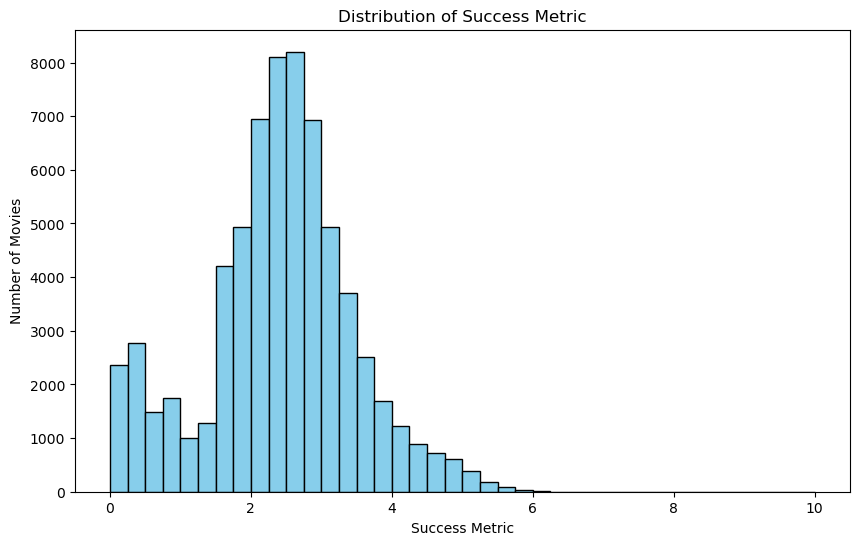

In [37]:
import matplotlib.pyplot as plt

# Create a histogram of the Success_metric
plt.figure(figsize=(10, 6))
plt.hist(data_box_office['Success_metric_scaled'].dropna(), bins=40, color='skyblue', edgecolor='black')

# Set the title and labels
plt.title('Distribution of Success Metric')
plt.xlabel('Success Metric')
plt.ylabel('Number of Movies')

# Show the plot
plt.show()